# Trabalho Final - Análise de Dados com Python

Integrantes:

    1) RM357067 - Edinaldo Rodrigues de Oliveira Junior
    2) RM358158 - Henrique Cardoso
    3) RM358067 - Jefferson de Souza Santos
    4) RM357344 - Walace Vinicius Silva dos Santos

# 1. Introdução

### Enunciado

A QuantumFinance está acompanhando um crescimento de inadimplência entre seus clientes e solicita a consultoria para desenvolver uma análise com base na sua carteira atual de clientes.

Para que a QuantumFinance tome decisões mais precisas sobre concessões de crédito, ela precisa aprimorar seu modelo de crédito. 

Com o objeto de trazer novos clientes com o perfil de baixo risco de crédito desenvolva um modelo de Credit Scoring.

Desafio: Desenvolver o modelo preditivo mediante uso do valor target disponível na base de dados “Base_ScoreCredito_QuantumFinance.csv” e criar um simulador do modelo para os analistas de créditos e gerentes de conta. 


#### Entregáveis:

Jupyter Notebook e Word


# 2. Configurações Iniciais

## 2.1. Importação de Bibliotecas

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy.stats import pointbiserialr

from scipy.stats.stats import pearsonr
from scipy.stats import pearsonr

from scipy.stats import chi2_contingency
from scipy.stats import chi2


import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/2217093645.py:8: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


## 2.2. Carregamento dos Dados

In [4]:
df_raw = pd.read_excel(r'Base_ScoreCredito_QuantumFinance.xlsx')
df_raw.head()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,40.089665,3,0,0,1,1,778.0
1,708083283,58,M,solteiro,ensino fundam,0,44,1,66.557645,3,0,0,1,0,276.3
2,708084558,46,M,divorciado,doutorado,3,35,1,123.681821,6,0,0,1,1,401.0
3,708085458,34,F,solteiro,mestrado,0,22,1,19.715934,6,0,0,1,0,347.4
4,708086958,49,F,casado,mestrado,2,36,0,0.000000,3,1,437,1,2,476.0


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10127 non-null  int64  
 1   idade                10127 non-null  int64  
 2   sexo                 10127 non-null  object 
 3   estado_civil         10127 non-null  object 
 4   escola               10127 non-null  object 
 5   Qte_dependentes      10127 non-null  int64  
 6   tempo_ultimoservico  10127 non-null  int64  
 7   trabalha             10127 non-null  int64  
 8   vl_salario_mil       10127 non-null  float64
 9   reg_moradia          10127 non-null  int64  
 10  casa_propria         10127 non-null  int64  
 11  vl_imovel_em_mil     10127 non-null  int64  
 12  Qte_cartoes          10127 non-null  int64  
 13  Qte_carros           10127 non-null  int64  
 14  SCORE_CREDITO        10127 non-null  float64
dtypes: float64(2), int64(10), object(3)


## 2.3. Tratamento fx_SCORE_CREDITO

In [6]:
# Criar os quartis
minimo = min(df_raw['SCORE_CREDITO'])
Q1 =  np.percentile(df_raw['SCORE_CREDITO'], 25)
Q2 =  np.percentile(df_raw['SCORE_CREDITO'], 50)
Q3 =  np.percentile(df_raw['SCORE_CREDITO'], 75)
maximo = max(df_raw['SCORE_CREDITO'])
print(minimo, Q1, Q2, Q3, maximo)

162.0 375.0 449.6 540.9 979.65


In [7]:
# Criar a variável faixa de quantidade de bikes alugadas
df_raw.loc[(df_raw['SCORE_CREDITO'] >= minimo) & (df_raw['SCORE_CREDITO'] <= Q1),     'fx_SCORE_CREDITO']='162 a 375'
df_raw.loc[(df_raw['SCORE_CREDITO'] > Q1)      & (df_raw['SCORE_CREDITO'] <= Q2),     'fx_SCORE_CREDITO']='375 a 449'
df_raw.loc[(df_raw['SCORE_CREDITO'] >  Q2)     & (df_raw['SCORE_CREDITO'] <=Q3),      'fx_SCORE_CREDITO']='449 a 540'
df_raw.loc[(df_raw['SCORE_CREDITO'] >  Q3)     & (df_raw['SCORE_CREDITO'] <= maximo), 'fx_SCORE_CREDITO']='540 a 979'

# 3. Análise Descritiva das variáveis

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/676689028.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index,


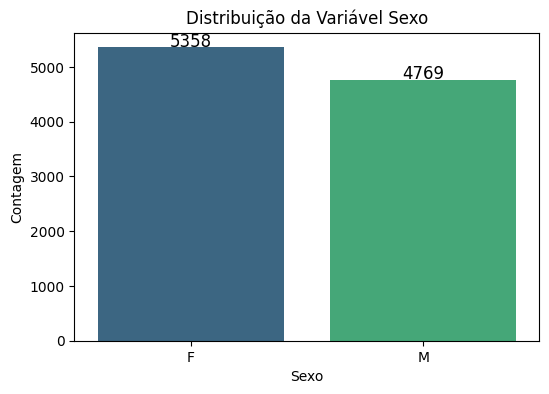

In [53]:
counts = df_raw['sexo'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=counts.index, 
                 y=counts.values, 
                 palette='viridis')

# Adicionar rótulos numéricos no topo das barras
for i, v in enumerate(counts.values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=12)

# Adicionar rótulos dos eixos e título
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.title('Distribuição da Variável Sexo')
plt.show()

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/2572474825.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index,


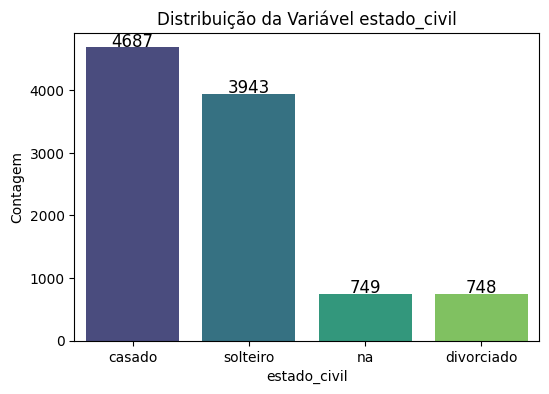

In [67]:
counts = df_raw['estado_civil'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=counts.index, 
                 y=counts.values, 
                 palette='viridis')

# Adicionar rótulos numéricos no topo das barras
for i, v in enumerate(counts.values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=12)

# Adicionar rótulos dos eixos e título
plt.xlabel('estado_civil')
plt.ylabel('Contagem')
plt.title('Distribuição da Variável estado_civil')
plt.show()

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/2400569145.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index,


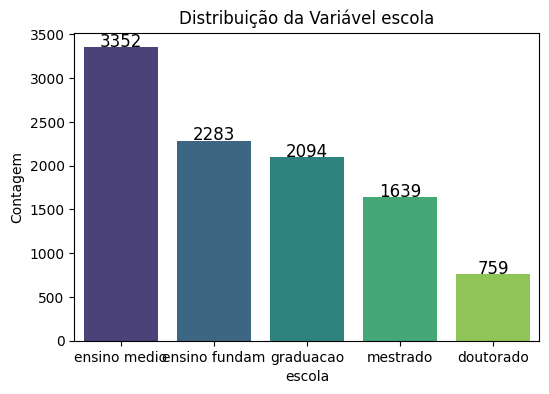

In [66]:
counts = df_raw['escola'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=counts.index, 
                 y=counts.values, 
                 palette='viridis')

# Adicionar rótulos numéricos no topo das barras
for i, v in enumerate(counts.values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=12)

# Adicionar rótulos dos eixos e título
plt.xlabel('escola')
plt.ylabel('Contagem')
plt.title('Distribuição da Variável escola')
plt.show()

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/1611687109.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index,


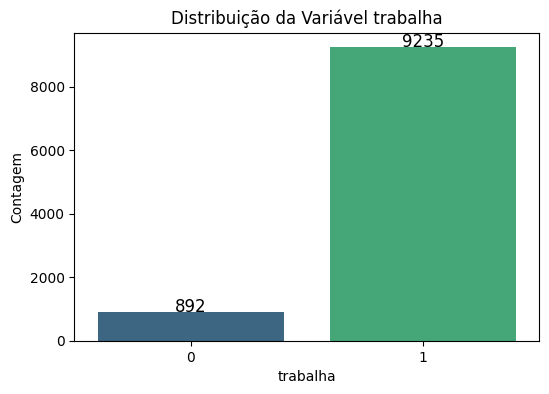

In [64]:
counts = df_raw['trabalha'].value_counts().sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=counts.index, 
                 y=counts.values, 
                 palette='viridis')

# Adicionar rótulos numéricos no topo das barras
for i, v in enumerate(counts.values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=12)

# Adicionar rótulos dos eixos e título
plt.xlabel('trabalha')
plt.ylabel('Contagem')
plt.title('Distribuição da Variável trabalha')
plt.show()

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/1719757012.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index,


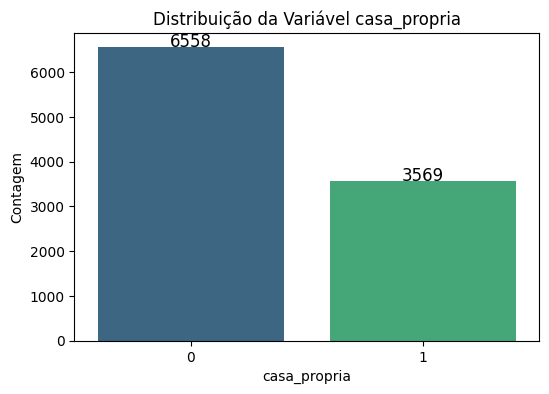

In [62]:
counts = df_raw['casa_propria'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=counts.index, 
                 y=counts.values, 
                 palette='viridis')

# Adicionar rótulos numéricos no topo das barras
for i, v in enumerate(counts.values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=12)

# Adicionar rótulos dos eixos e título
plt.xlabel('casa_propria')
plt.ylabel('Contagem')
plt.title('Distribuição da Variável casa_propria')
plt.show()

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/2259330388.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


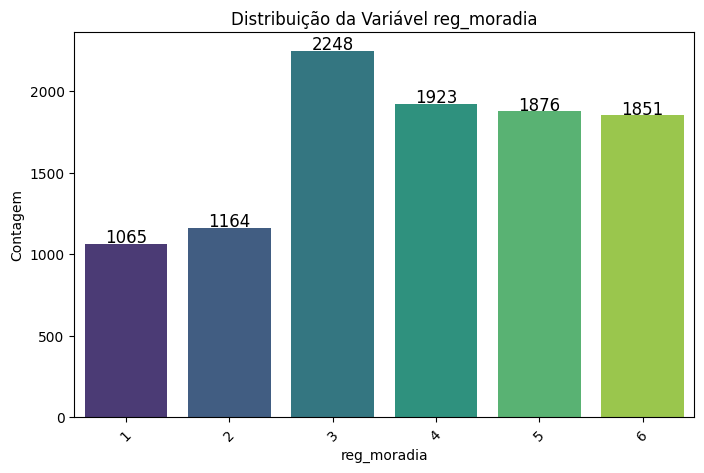

In [61]:
# Contar e ordenar os valores da coluna 'reg_moradia'
counts = df_raw['reg_moradia'].value_counts().sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Adicionar rótulos numéricos no topo das barras
for i, v in enumerate(counts.values):
    ax.text(i, v + 5, str(v), ha='center', fontsize=12)

# Adicionar rótulos dos eixos e título
plt.xlabel('reg_moradia')
plt.ylabel('Contagem')
plt.title('Distribuição da Variável reg_moradia')

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X se necessário
plt.show()

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/1977211018.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


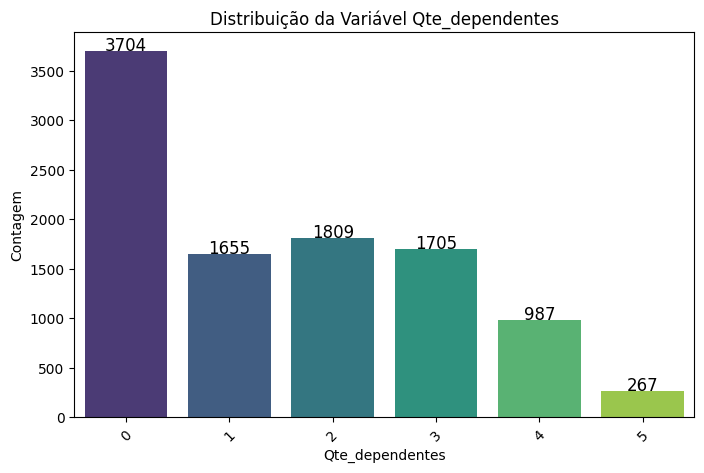

In [68]:
counts = df_raw['Qte_dependentes'].value_counts().sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Adicionar rótulos numéricos no topo das barras
for i, v in enumerate(counts.values):
    ax.text(i, v + 5, str(v), ha='center', fontsize=12)

# Adicionar rótulos dos eixos e título
plt.xlabel('Qte_dependentes')
plt.ylabel('Contagem')
plt.title('Distribuição da Variável Qte_dependentes')

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X se necessário
plt.show()

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/2058465530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


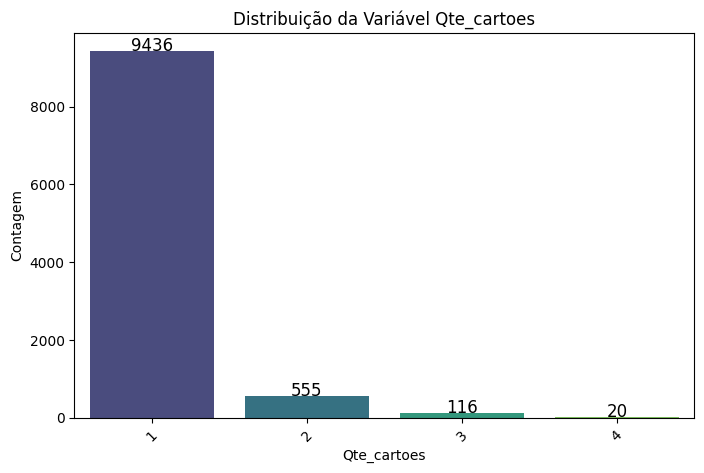

In [81]:
counts = df_raw['Qte_cartoes'].value_counts().sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Adicionar rótulos numéricos no topo das barras
for i, v in enumerate(counts.values):
    ax.text(i, v + 5, str(v), ha='center', fontsize=12)

# Adicionar rótulos dos eixos e título
plt.xlabel('Qte_cartoes')
plt.ylabel('Contagem')
plt.title('Distribuição da Variável Qte_cartoes')

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X se necessário
plt.show()

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/4251736073.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


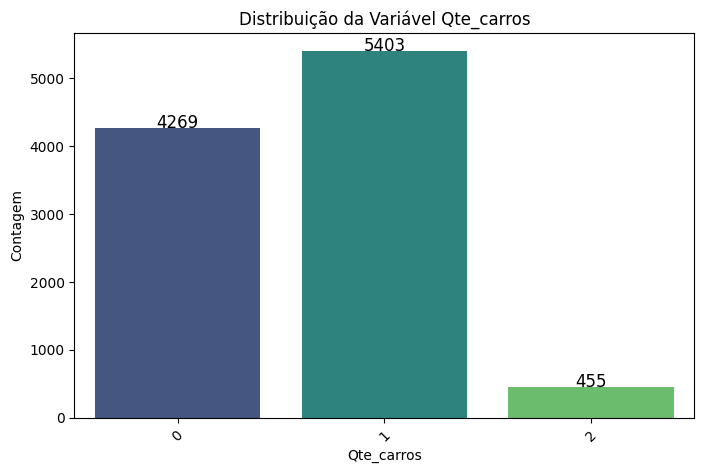

In [82]:
counts = df_raw['Qte_carros'].value_counts().sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Adicionar rótulos numéricos no topo das barras
for i, v in enumerate(counts.values):
    ax.text(i, v + 5, str(v), ha='center', fontsize=12)

# Adicionar rótulos dos eixos e título
plt.xlabel('Qte_carros')
plt.ylabel('Contagem')
plt.title('Distribuição da Variável Qte_carros')

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X se necessário
plt.show()

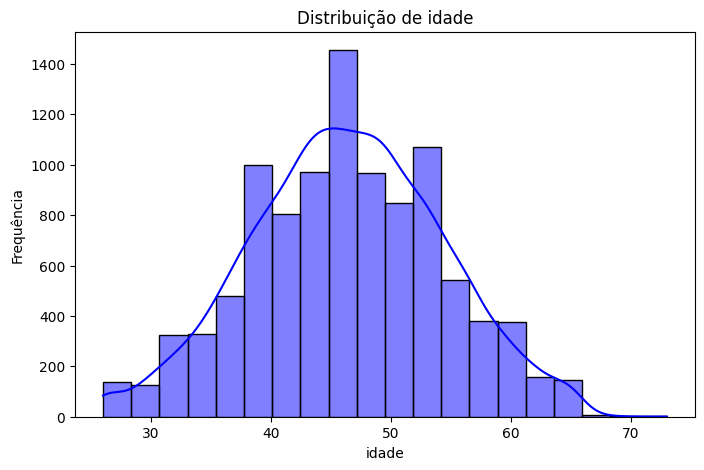

In [74]:
variavel = 'idade'
# Criar o histograma
plt.figure(figsize=(8, 5))
sns.histplot(df_raw[variavel], bins=20, kde=True, color='blue')

# Adicionar rótulos
plt.xlabel(variavel)
plt.ylabel('Frequência')
plt.title(f'Distribuição de {variavel}')
plt.show()

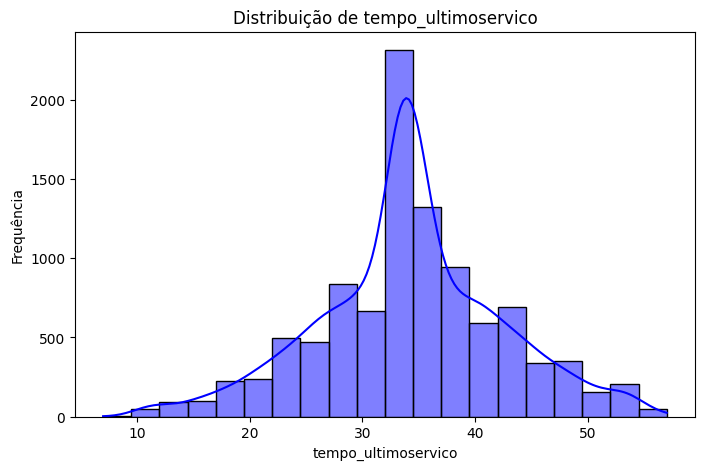

In [75]:
variavel = 'tempo_ultimoservico'
# Criar o histograma
plt.figure(figsize=(8, 5))
sns.histplot(df_raw[variavel], bins=20, kde=True, color='blue')

# Adicionar rótulos
plt.xlabel(variavel)
plt.ylabel('Frequência')
plt.title(f'Distribuição de {variavel}')
plt.show()

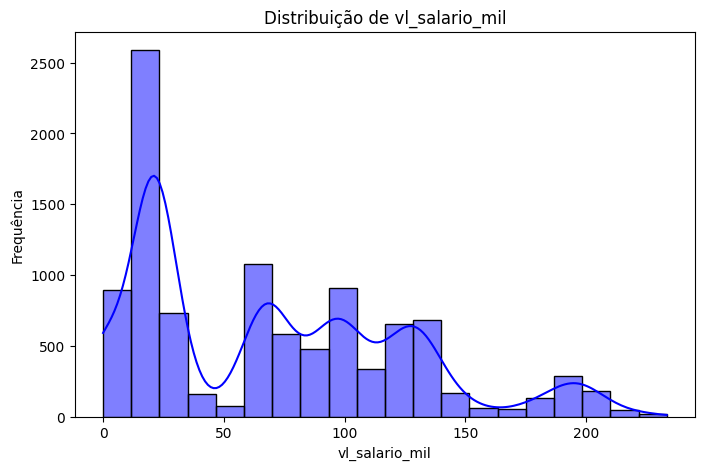

In [76]:
variavel = 'vl_salario_mil'
# Criar o histograma
plt.figure(figsize=(8, 5))
sns.histplot(df_raw[variavel], bins=20, kde=True, color='blue')

# Adicionar rótulos
plt.xlabel(variavel)
plt.ylabel('Frequência')
plt.title(f'Distribuição de {variavel}')
plt.show()

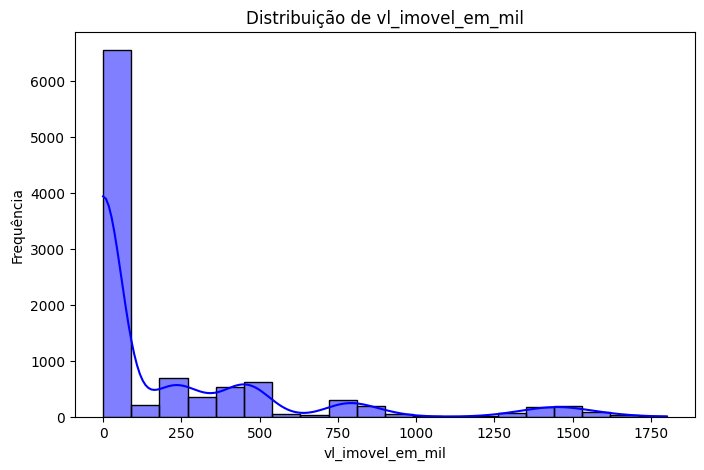

In [77]:
variavel = 'vl_imovel_em_mil'
# Criar o histograma
plt.figure(figsize=(8, 5))
sns.histplot(df_raw[variavel], bins=20, kde=True, color='blue')

# Adicionar rótulos
plt.xlabel(variavel)
plt.ylabel('Frequência')
plt.title(f'Distribuição de {variavel}')
plt.show()

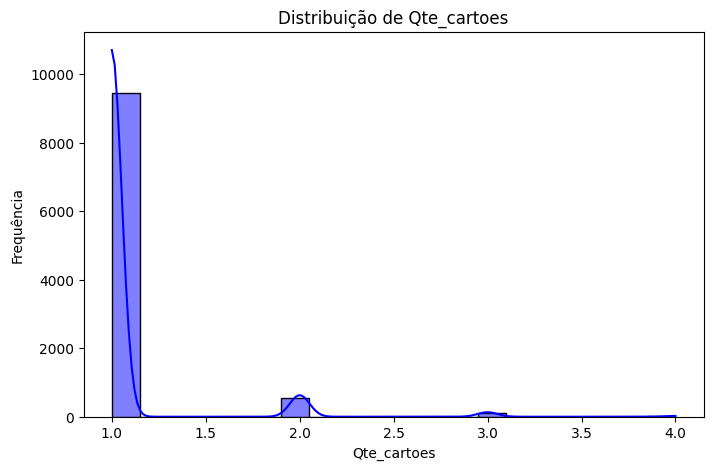

In [78]:
variavel = 'Qte_cartoes'
# Criar o histograma
plt.figure(figsize=(8, 5))
sns.histplot(df_raw[variavel], bins=20, kde=True, color='blue')

# Adicionar rótulos
plt.xlabel(variavel)
plt.ylabel('Frequência')
plt.title(f'Distribuição de {variavel}')
plt.show()

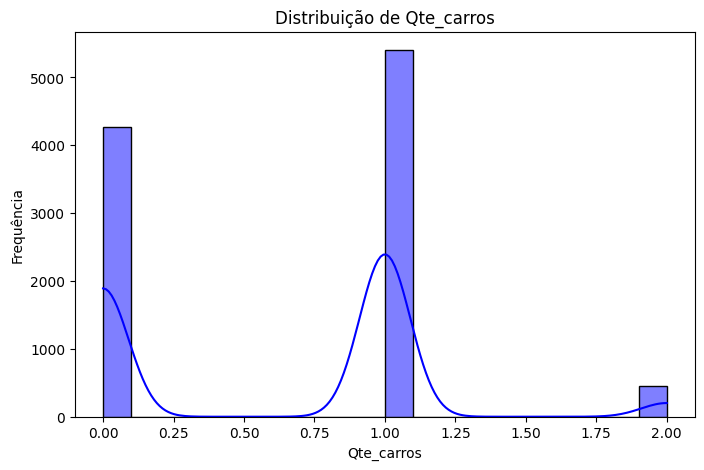

In [79]:
variavel = 'Qte_carros'
# Criar o histograma
plt.figure(figsize=(8, 5))
sns.histplot(df_raw[variavel], bins=20, kde=True, color='blue')

# Adicionar rótulos
plt.xlabel(variavel)
plt.ylabel('Frequência')
plt.title(f'Distribuição de {variavel}')
plt.show()

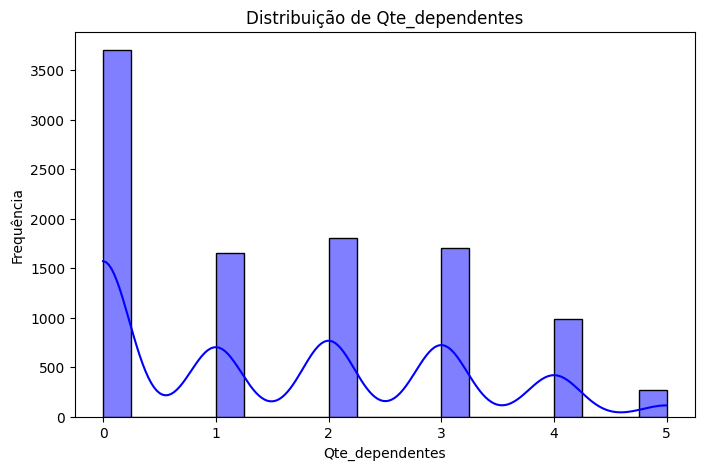

In [80]:
variavel = 'Qte_dependentes'
# Criar o histograma
plt.figure(figsize=(8, 5))
sns.histplot(df_raw[variavel], bins=20, kde=True, color='blue')

# Adicionar rótulos
plt.xlabel(variavel)
plt.ylabel('Frequência')
plt.title(f'Distribuição de {variavel}')
plt.show()

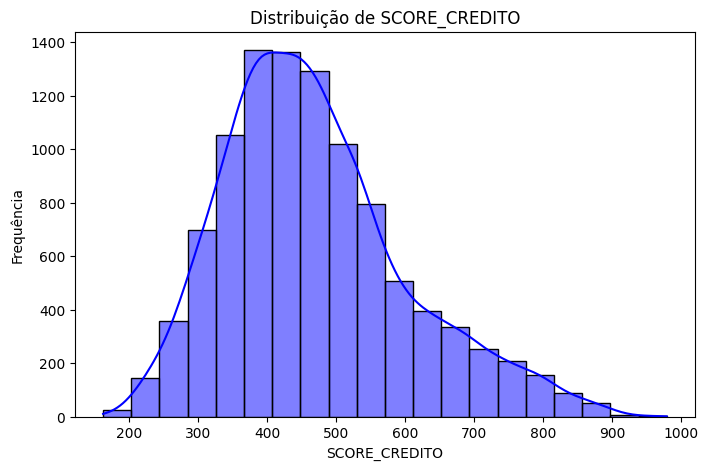

In [188]:
variavel = 'SCORE_CREDITO'
# Criar o histograma
plt.figure(figsize=(8, 5))
sns.histplot(df_raw[variavel], bins=20, kde=True, color='blue')

# Adicionar rótulos
plt.xlabel(variavel)
plt.ylabel('Frequência')
plt.title(f'Distribuição de {variavel}')
plt.show()

## 3.1 Colinearidade

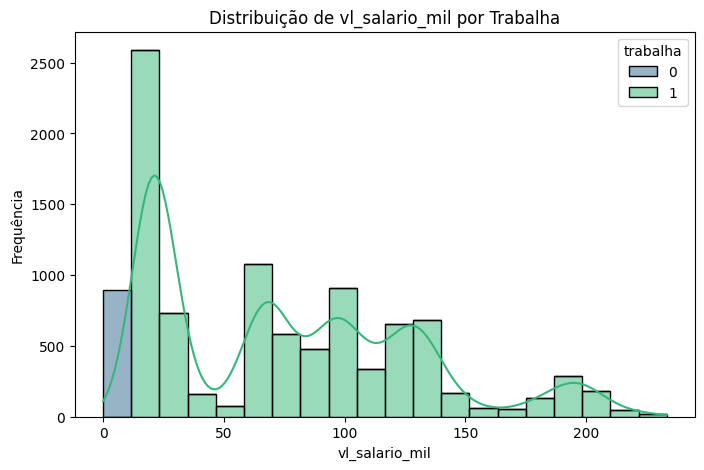

In [98]:
variavel = 'vl_salario_mil'

# Criar o histograma com a variável 'trabalha' como hue
plt.figure(figsize=(8, 5))
sns.histplot(df_raw, 
             x=variavel, 
             hue='trabalha', 
             bins=20, 
             kde=True, 
             multiple='stack',  # Muda para 'dodge' se quiser histogramas lado a lado
             palette='viridis')

# Adicionar rótulos
plt.xlabel(variavel)
plt.ylabel('Frequência')
plt.title(f'Distribuição de {variavel} por Trabalha')
plt.show()

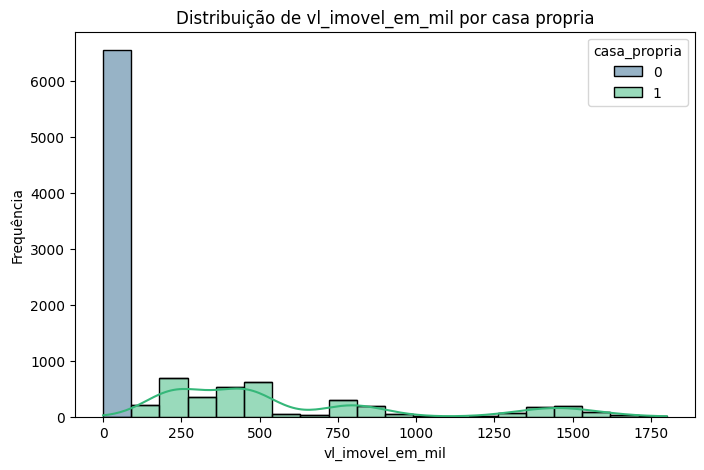

In [101]:
variavel = 'vl_imovel_em_mil'

# Criar o histograma com a variável 'trabalha' como hue
plt.figure(figsize=(8, 5))
sns.histplot(df_raw, 
             x=variavel, 
             hue='casa_propria', 
             bins=20, 
             kde=True, 
             multiple='stack',  # Muda para 'dodge' se quiser histogramas lado a lado
             palette='viridis')

# Adicionar rótulos
plt.xlabel(variavel)
plt.ylabel('Frequência')
plt.title(f'Distribuição de {variavel} por casa propria')
plt.show()

# 4. Análise Bivariada das variáveis

## 4.1 idade

<Figure size 1000x600 with 0 Axes>

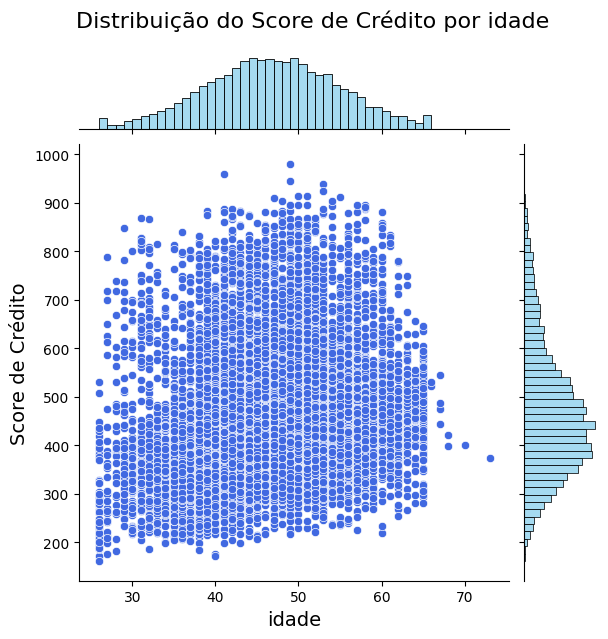

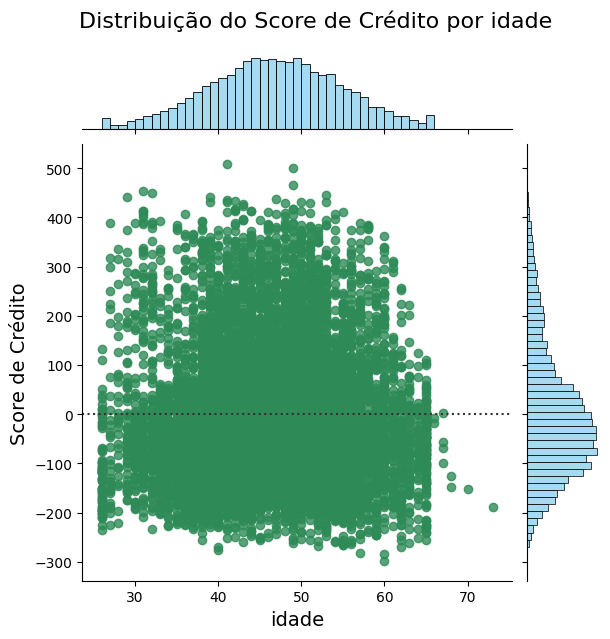

In [8]:
# Define a variável
variavel = 'idade'

# Criar uma figura grande
fig = plt.figure(figsize=(10, 6))

# Criar primeiro gráfico (Scatter)
g1 = sns.jointplot(
    x= variavel, 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='scatter',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="royalblue"
)

g1.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g1.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Criar segundo gráfico (Residuais)
g2 = sns.jointplot(
    x='idade', 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='resid',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="seagreen"
)
g2.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g2.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Exibir os gráficos
plt.show()


In [9]:
# Correlação de Pearson
pearsonr(df_raw['idade'], df_raw['SCORE_CREDITO'])

PearsonRResult(statistic=np.float64(0.2133198240252024), pvalue=np.float64(1.4881542889982393e-104))

## 4.2 sexo

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/3724121811.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')


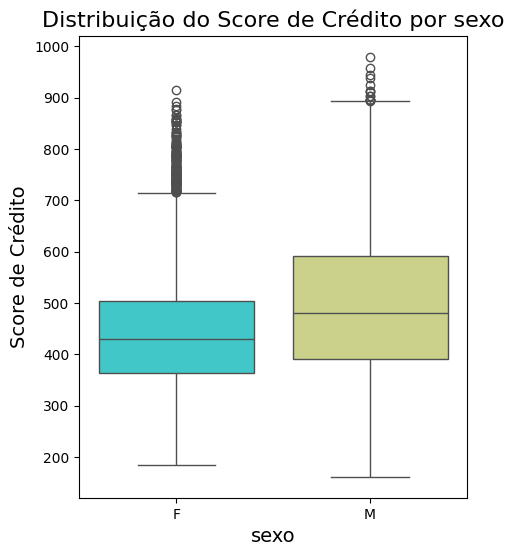

In [10]:
# Define a variável
variavel = 'sexo'

# Criar uma figura grande
fig = plt.figure(figsize=(5, 6))

# Box Plot
g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')

# Ajuste dos rótulos
g1.set_xlabel(f"{variavel}", fontsize=14)  # Definir o rótulo do eixo X
g1.set_ylabel("Score de Crédito", fontsize=14)  # Definir o rótulo do eixo Y
g1.set_title(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)

# Exibir os gráficos
plt.show()


<Figure size 500x600 with 0 Axes>

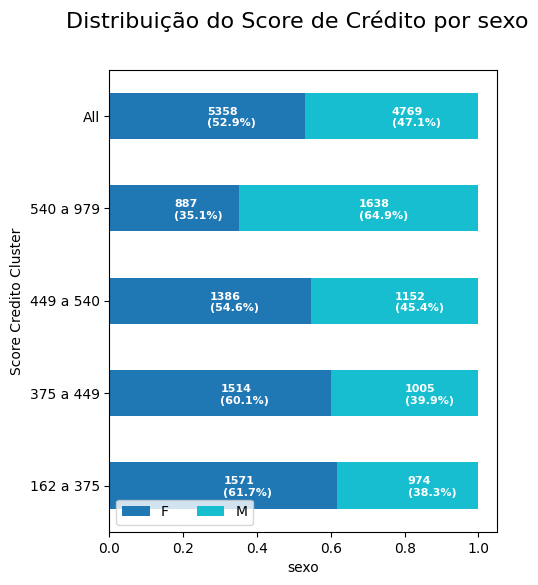

In [11]:
# Tabela bivariada - números absolutos
cross_tab = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'], columns=df_raw['sexo'],margins=True)
# Tabela bivariada - proporção
cross_tab_prop = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'],
                             columns=df_raw['sexo'],
                             normalize="index",margins=True,
                             margins_name='All')

# gráfico 100% empilhado com label
fig = plt.figure(figsize=(5, 6))

cross_tab_prop.plot(kind='barh',
                        stacked=True,
                        colormap='tab10',
                        figsize=(5, 6))

plt.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.legend(loc="lower left", ncol=2)
plt.xlabel(f"{variavel}")
plt.ylabel("Score Credito Cluster")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="white",
                 fontsize=8,
                 fontweight="bold")

plt.show()

In [12]:
# Teste qui-quadrado entre total e estação do ano
# Existe associação?
table1 = pd.crosstab(df_raw['fx_SCORE_CREDITO'],df_raw[variavel])

# estatísticas stat = valor do qui-quadrado, p= p-value, dof=graus de liberdade, expected = valores esperados
stat, p, dof, expected = chi2_contingency(table1)

# Interpretação do teste qui-quadrado
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=3
[[1346.51031895 1198.48968105]
 [1332.75422139 1186.24577861]
 [1342.80675422 1195.19324578]
 [1335.92870544 1189.07129456]]
probability=0.950, critical=7.815, stat=455.117
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


## 4.3 Estado Civil

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/1518379358.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')


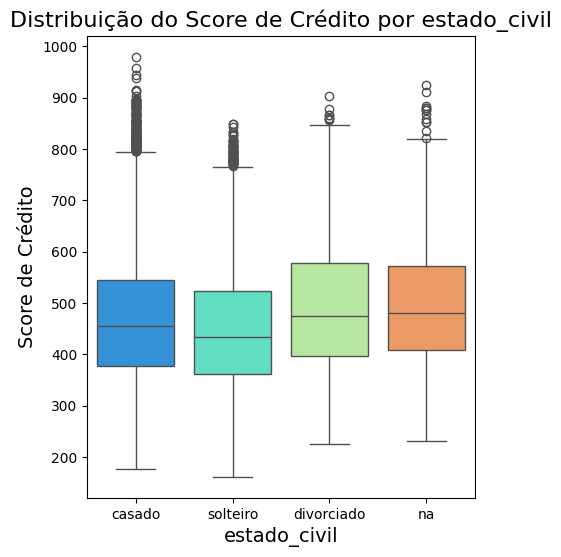

In [13]:
# Define a variável
variavel = 'estado_civil'

# Criar uma figura grande
fig = plt.figure(figsize=(5, 6))

# Box Plot
g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')

# Ajuste dos rótulos
g1.set_xlabel(f"{variavel}", fontsize=14)  # Definir o rótulo do eixo X
g1.set_ylabel("Score de Crédito", fontsize=14)  # Definir o rótulo do eixo Y
g1.set_title(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)

# Exibir os gráficos
plt.show()

<Figure size 500x600 with 0 Axes>

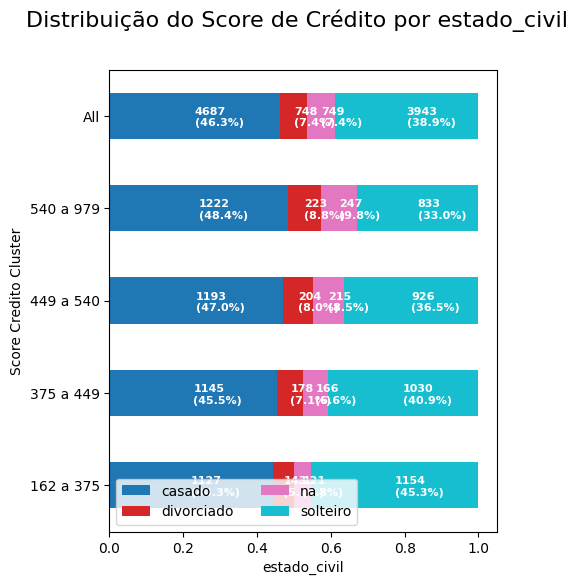

In [14]:
# Tabela bivariada - números absolutos
cross_tab = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'], columns=df_raw[variavel],margins=True)
# Tabela bivariada - proporção
cross_tab_prop = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'],
                             columns=df_raw[variavel],
                             normalize="index",margins=True,
                             margins_name='All')

# gráfico 100% empilhado com label
fig = plt.figure(figsize=(5, 6))

cross_tab_prop.plot(kind='barh',
                        stacked=True,
                        colormap='tab10',
                        figsize=(5, 6))

plt.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.legend(loc="lower left", ncol=2)
plt.xlabel(f"{variavel}")
plt.ylabel("Score Credito Cluster")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="white",
                 fontsize=8,
                 fontweight="bold")

plt.show()

In [15]:

# Teste qui-quadrado entre total e estação do ano
# Existe associação?
table1 = pd.crosstab(df_raw['fx_SCORE_CREDITO'],df_raw[variavel])

# estatísticas stat = valor do qui-quadrado, p= p-value, dof=graus de liberdade, expected = valores esperados
stat, p, dof, expected = chi2_contingency(table1)

# Interpretação do teste qui-quadrado
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=9
[[1177.8823936   187.97867088  188.22997926  990.90895626]
 [1165.84901748  186.0582601   186.30700109  980.78572134]
 [1174.64263849  187.46163721  187.71225437  988.18346993]
 [1168.62595043  186.50143182  186.75076528  983.12185247]]
probability=0.950, critical=16.919, stat=130.788
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


## 4.4 Escola

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/158107889.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')


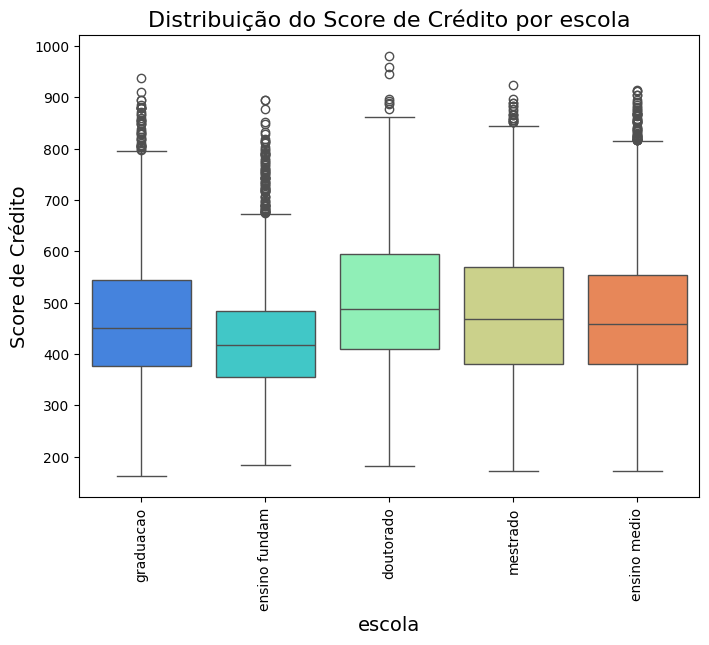

In [16]:
# Define a variável
variavel = 'escola'

# Criar uma figura grande
fig = plt.figure(figsize=(8, 6))

# Box Plot
g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')

# Ajuste dos rótulos
g1.set_xlabel(f"{variavel}", fontsize=14)  # Definir o rótulo do eixo X
g1.set_ylabel("Score de Crédito", fontsize=14)  # Definir o rótulo do eixo Y
g1.set_title(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.xticks(rotation=90)

# Exibir os gráficos
plt.show()

<Figure size 500x600 with 0 Axes>

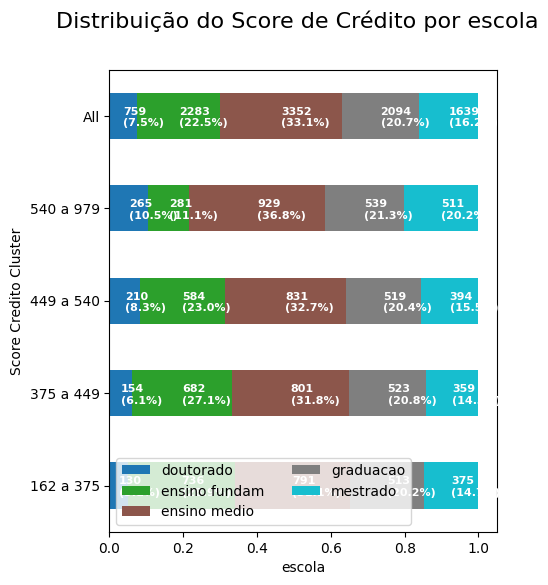

In [17]:
# Tabela bivariada - números absolutos
cross_tab = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'], columns=df_raw[variavel],margins=True)
# Tabela bivariada - proporção
cross_tab_prop = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'],
                             columns=df_raw[variavel],
                             normalize="index",margins=True,
                             margins_name='All')

# gráfico 100% empilhado com label
fig = plt.figure(figsize=(5, 6))

cross_tab_prop.plot(kind='barh',
                        stacked=True,
                        colormap='tab10',
                        figsize=(5, 6))

plt.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.legend(loc="lower left", ncol=2)
plt.xlabel(f"{variavel}")
plt.ylabel("Score Credito Cluster")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="white",
                 fontsize=8,
                 fontweight="bold")

plt.show()

In [18]:

# Teste qui-quadrado entre total e estação do ano
# Existe associação?
table1 = pd.crosstab(df_raw['fx_SCORE_CREDITO'],df_raw[variavel])

# estatísticas stat = valor do qui-quadrado, p= p-value, dof=graus de liberdade, expected = valores esperados
stat, p, dof, expected = chi2_contingency(table1)

# Interpretação do teste qui-quadrado
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=12
[[190.7430631  573.7370396  842.38570159 526.23975511 411.8944406 ]
 [188.79441098 567.87567888 833.77979658 520.86363188 407.68648168]
 [190.21842599 572.15898094 840.06872717 524.79233732 410.76152859]
 [189.24409993 569.22830058 835.76577466 522.1042757  408.65754913]]
probability=0.950, critical=21.026, stat=324.462
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


## 4.5 Qtde_Dependentes

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/887680058.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')


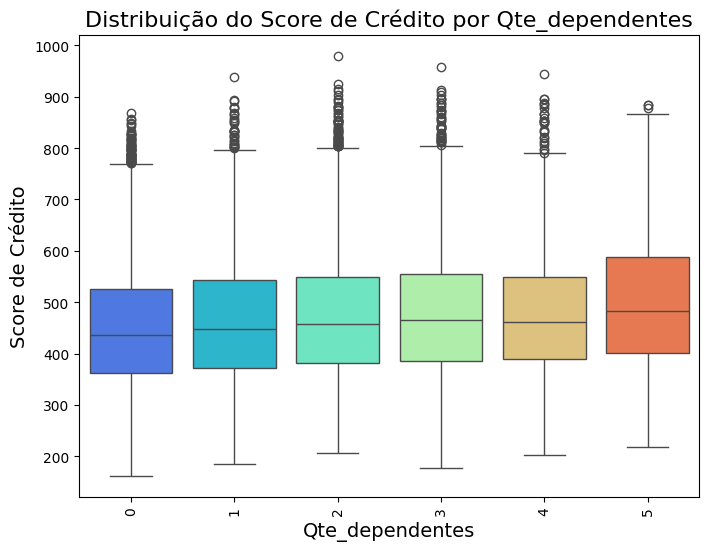

In [19]:
# Define a variável
variavel = 'Qte_dependentes'

# Criar uma figura grande
fig = plt.figure(figsize=(8, 6))

# Box Plot
g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')

# Ajuste dos rótulos
g1.set_xlabel(f"{variavel}", fontsize=14)  # Definir o rótulo do eixo X
g1.set_ylabel("Score de Crédito", fontsize=14)  # Definir o rótulo do eixo Y
g1.set_title(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.xticks(rotation=90)

# Exibir os gráficos
plt.show()

<Figure size 500x600 with 0 Axes>

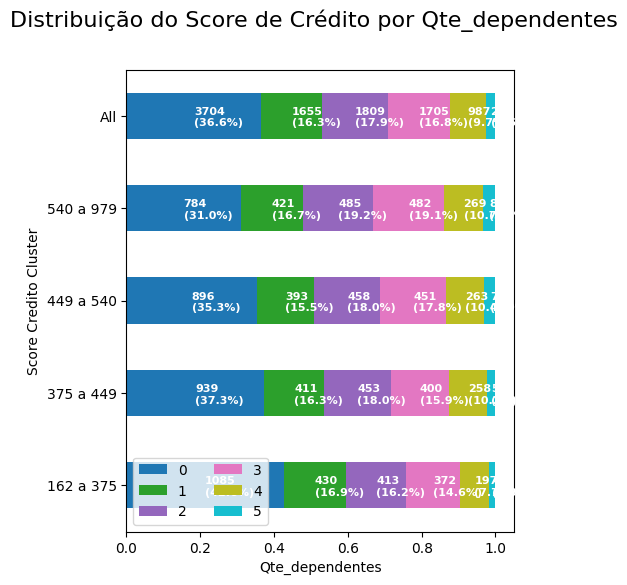

In [20]:
# Tabela bivariada - números absolutos
cross_tab = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'], columns=df_raw[variavel],margins=True)
# Tabela bivariada - proporção
cross_tab_prop = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'],
                             columns=df_raw[variavel],
                             normalize="index",margins=True,
                             margins_name='All')

# gráfico 100% empilhado com label
fig = plt.figure(figsize=(5, 6))

cross_tab_prop.plot(kind='barh',
                        stacked=True,
                        colormap='tab10',
                        figsize=(5, 6))

plt.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.legend(loc="lower left", ncol=2)
plt.xlabel(f"{variavel}")
plt.ylabel("Score Credito Cluster")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="white",
                 fontsize=8,
                 fontweight="bold")

plt.show()

In [21]:
# Teste qui-quadrado entre total e estação do ano
# Existe associação?
table1 = pd.crosstab(df_raw['fx_SCORE_CREDITO'],df_raw[variavel])

# estatísticas stat = valor do qui-quadrado, p= p-value, dof=graus de liberdade, expected = valores esperados
stat, p, dof, expected = chi2_contingency(table1)

# Interpretação do teste qui-quadrado
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=15
[[930.84625259 415.91537474 454.6168658  428.48079392 248.04137454
   67.0993384 ]
 [921.33662486 411.66633751 449.97244989 424.10338699 245.50735657
   66.41384418]
 [928.2859682  414.77140318 453.36644613 427.30226128 247.35913894
   66.91478227]
 [923.53115434 412.64688457 451.04423818 425.11355782 246.09212995
   66.57203515]]
probability=0.950, critical=24.996, stat=100.882
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


<Figure size 1000x600 with 0 Axes>

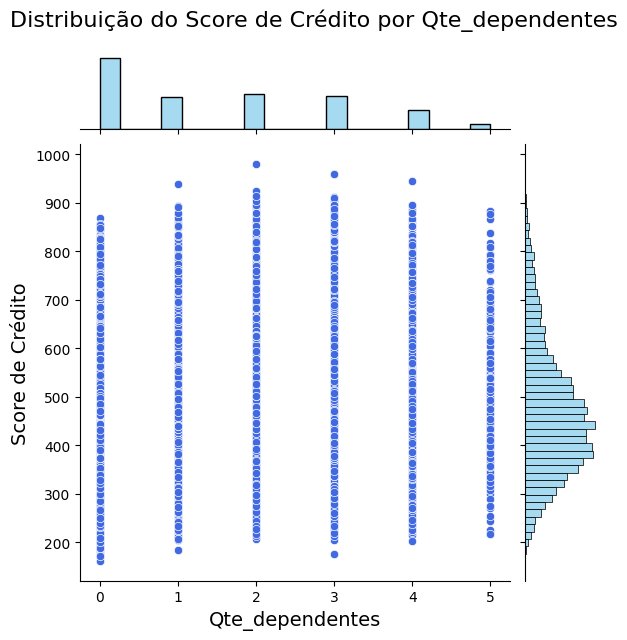

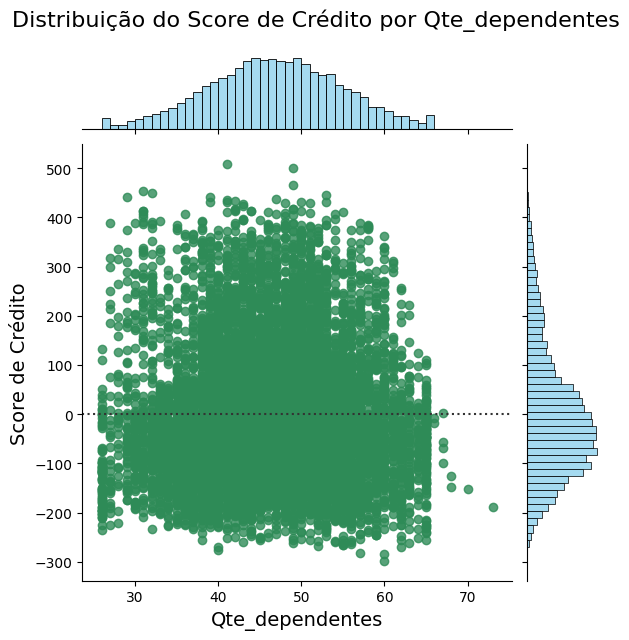

In [83]:
# Define a variável
variavel = 'Qte_dependentes'

# Criar uma figura grande
fig = plt.figure(figsize=(10, 6))

# Criar primeiro gráfico (Scatter)
g1 = sns.jointplot(
    x= variavel, 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='scatter',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="royalblue"
)

g1.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g1.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Criar segundo gráfico (Residuais)
g2 = sns.jointplot(
    x='idade', 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='resid',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="seagreen"
)
g2.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g2.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Exibir os gráficos
plt.show()


In [84]:
# Correlação de Pearson
pearsonr(df_raw[variavel], df_raw['SCORE_CREDITO'])

PearsonRResult(statistic=np.float64(0.10355378295266382), pvalue=np.float64(1.5006116392636743e-25))

## 4.6 tempo_ultimoservico

<Figure size 1000x600 with 0 Axes>

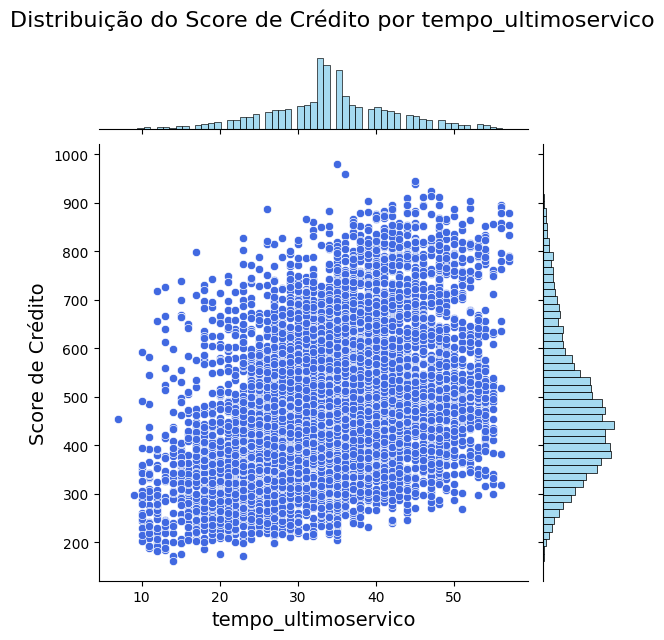

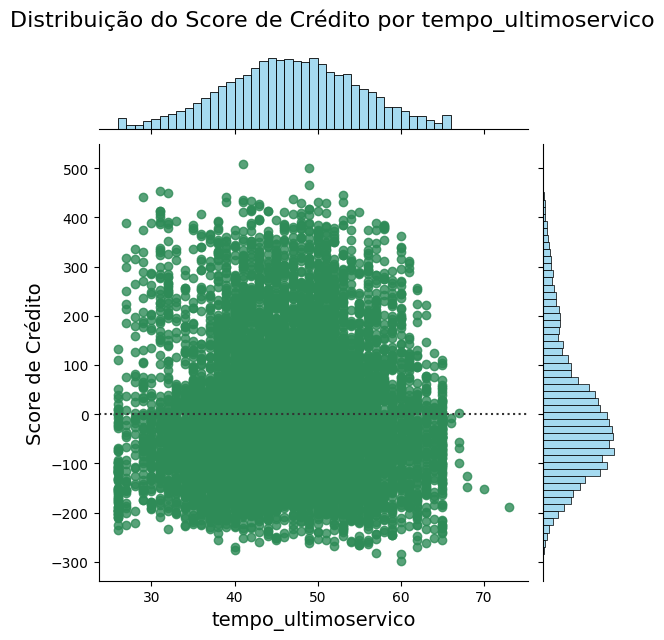

In [22]:
# Define a variável
variavel = 'tempo_ultimoservico'

# Criar uma figura grande
fig = plt.figure(figsize=(10, 6))

# Criar primeiro gráfico (Scatter)
g1 = sns.jointplot(
    x= variavel, 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='scatter',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="royalblue"
)

g1.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g1.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Criar segundo gráfico (Residuais)
g2 = sns.jointplot(
    x='idade', 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='resid',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="seagreen"
)
g2.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g2.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Exibir os gráficos
plt.show()

In [23]:
# Correlação de Pearson
pearsonr(df_raw[variavel], df_raw['SCORE_CREDITO'])

PearsonRResult(statistic=np.float64(0.3839975897495746), pvalue=np.float64(0.0))

In [24]:
df_raw.columns

Index(['id', 'idade', 'sexo', 'estado_civil', 'escola', 'Qte_dependentes',
       'tempo_ultimoservico', 'trabalha', 'vl_salario_mil', 'reg_moradia',
       'casa_propria', 'vl_imovel_em_mil', 'Qte_cartoes', 'Qte_carros',
       'SCORE_CREDITO', 'fx_SCORE_CREDITO'],
      dtype='object')

## 4.7 trabalha

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/2400046822.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')


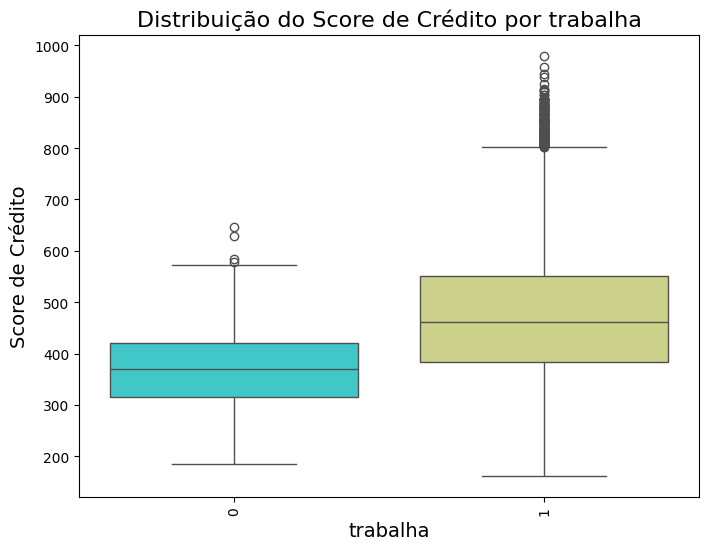

In [25]:
# Define a variável
variavel = 'trabalha'

# Criar uma figura grande
fig = plt.figure(figsize=(8, 6))

# Box Plot
g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')

# Ajuste dos rótulos
g1.set_xlabel(f"{variavel}", fontsize=14)  # Definir o rótulo do eixo X
g1.set_ylabel("Score de Crédito", fontsize=14)  # Definir o rótulo do eixo Y
g1.set_title(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.xticks(rotation=90)

# Exibir os gráficos
plt.show()

<Figure size 500x600 with 0 Axes>

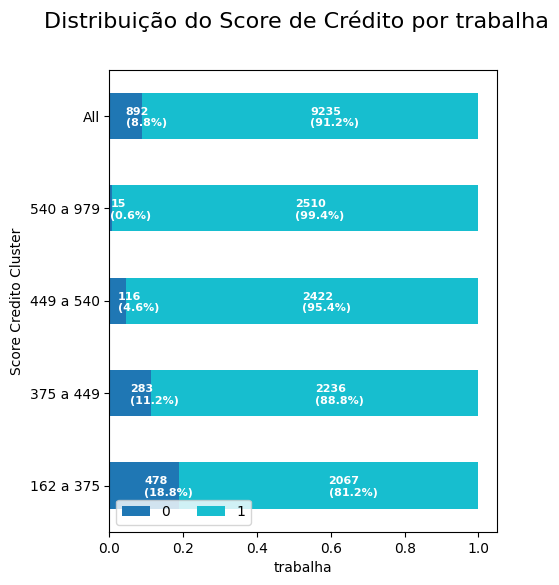

In [26]:
# Tabela bivariada - números absolutos
cross_tab = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'], columns=df_raw[variavel],margins=True)
# Tabela bivariada - proporção
cross_tab_prop = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'],
                             columns=df_raw[variavel],
                             normalize="index",margins=True,
                             margins_name='All')

# gráfico 100% empilhado com label
fig = plt.figure(figsize=(5, 6))

cross_tab_prop.plot(kind='barh',
                        stacked=True,
                        colormap='tab10',
                        figsize=(5, 6))

plt.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.legend(loc="lower left", ncol=2)
plt.xlabel(f"{variavel}")
plt.ylabel("Score Credito Cluster")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="white",
                 fontsize=8,
                 fontweight="bold")

plt.show()

In [27]:

# Teste qui-quadrado entre total e estação do ano
# Existe associação?
table1 = pd.crosstab(df_raw['fx_SCORE_CREDITO'],df_raw[variavel])

# estatísticas stat = valor do qui-quadrado, p= p-value, dof=graus de liberdade, expected = valores esperados
stat, p, dof, expected = chi2_contingency(table1)

# Interpretação do teste qui-quadrado
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=3
[[ 224.16707811 2320.83292189]
 [ 221.87696258 2297.12303742]
 [ 223.55050854 2314.44949146]
 [ 222.40545078 2302.59454922]]
probability=0.950, critical=7.815, stat=602.491
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


## 4.8 vl_salario_mil

<Figure size 1000x600 with 0 Axes>

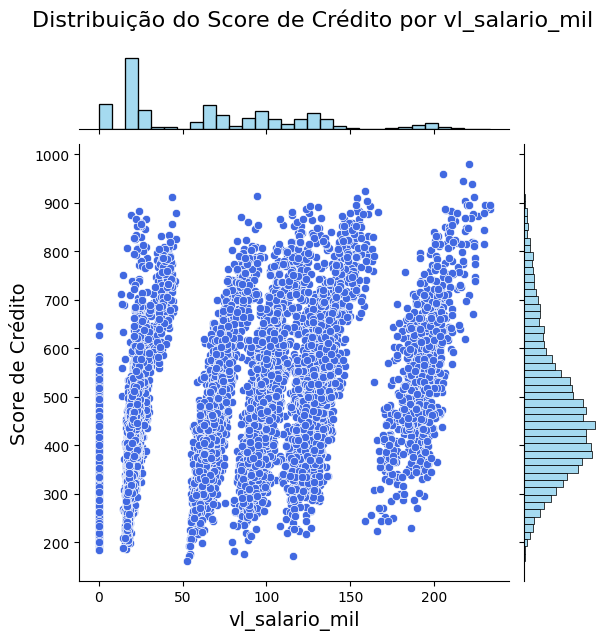

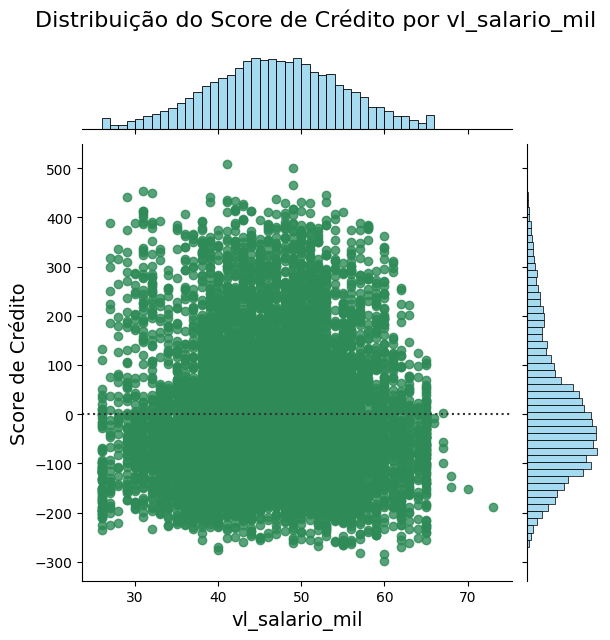

In [28]:
# Define a variável
variavel = 'vl_salario_mil'

# Criar uma figura grande
fig = plt.figure(figsize=(10, 6))

# Criar primeiro gráfico (Scatter)
g1 = sns.jointplot(
    x= variavel, 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='scatter',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="royalblue"
)

g1.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g1.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Criar segundo gráfico (Residuais)
g2 = sns.jointplot(
    x='idade', 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='resid',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="seagreen"
)
g2.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g2.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Exibir os gráficos
plt.show()

In [29]:
# Correlação de Pearson
pearsonr(df_raw[variavel], df_raw['SCORE_CREDITO'])

PearsonRResult(statistic=np.float64(0.41412677172229184), pvalue=np.float64(0.0))

## 4.9 reg_moradia

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/3722256150.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')


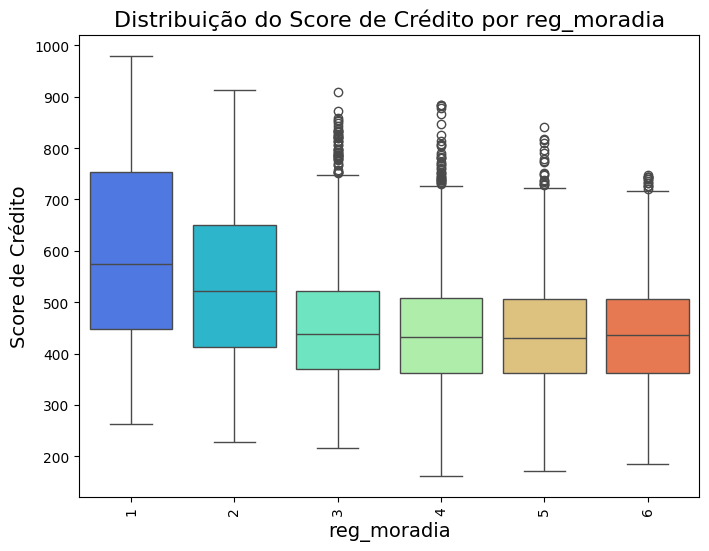

In [30]:
# Define a variável
variavel = 'reg_moradia'

# Criar uma figura grande
fig = plt.figure(figsize=(8, 6))

# Box Plot
g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')

# Ajuste dos rótulos
g1.set_xlabel(f"{variavel}", fontsize=14)  # Definir o rótulo do eixo X
g1.set_ylabel("Score de Crédito", fontsize=14)  # Definir o rótulo do eixo Y
g1.set_title(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.xticks(rotation=90)

# Exibir os gráficos
plt.show()

<Figure size 500x600 with 0 Axes>

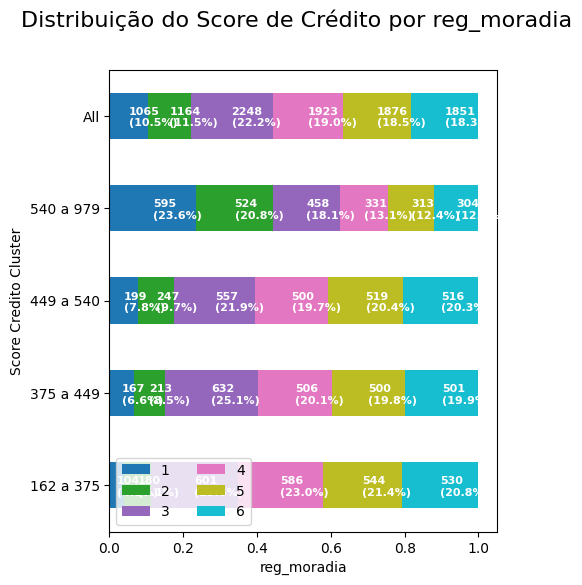

In [31]:
# Tabela bivariada - números absolutos
cross_tab = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'], columns=df_raw[variavel],margins=True)
# Tabela bivariada - proporção
cross_tab_prop = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'],
                             columns=df_raw[variavel],
                             normalize="index",margins=True,
                             margins_name='All')

# gráfico 100% empilhado com label
fig = plt.figure(figsize=(5, 6))

cross_tab_prop.plot(kind='barh',
                        stacked=True,
                        colormap='tab10',
                        figsize=(5, 6))

plt.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.legend(loc="lower left", ncol=2)
plt.xlabel(f"{variavel}")
plt.ylabel("Score Credito Cluster")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="white",
                 fontsize=8,
                 fontweight="bold")

plt.show()

In [32]:
# Teste qui-quadrado entre total e estação do ano
# Existe associação?
table1 = pd.crosstab(df_raw['fx_SCORE_CREDITO'],df_raw[variavel])

# estatísticas stat = valor do qui-quadrado, p= p-value, dof=graus de liberdade, expected = valores esperados
stat, p, dof, expected = chi2_contingency(table1)

# Interpretação do teste qui-quadrado
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=15
[[267.64342846 292.52295843 564.94124617 483.26602153 471.4545275
  465.17181791]
 [264.90915375 289.5345117  559.16974425 478.32892268 466.63809618
  460.41957144]
 [266.90727757 291.71837662 563.38738027 481.93680261 470.15779599
  463.89236694]
 [265.54014022 290.22415325 560.50162931 479.46825318 467.74958033
  461.5162437 ]]
probability=0.950, critical=24.996, stat=1063.701
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


## 4.10 casa_propria

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/1531731214.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')


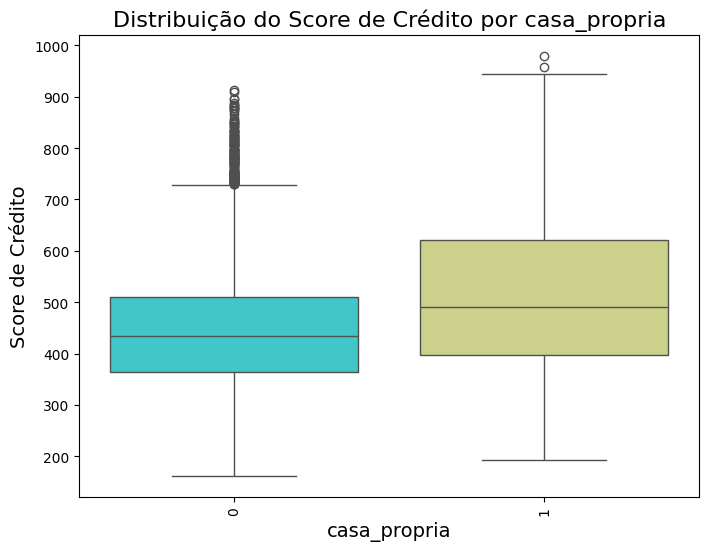

In [33]:
# Define a variável
variavel = 'casa_propria'

# Criar uma figura grande
fig = plt.figure(figsize=(8, 6))

# Box Plot
g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')

# Ajuste dos rótulos
g1.set_xlabel(f"{variavel}", fontsize=14)  # Definir o rótulo do eixo X
g1.set_ylabel("Score de Crédito", fontsize=14)  # Definir o rótulo do eixo Y
g1.set_title(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.xticks(rotation=90)

# Exibir os gráficos
plt.show()

<Figure size 500x600 with 0 Axes>

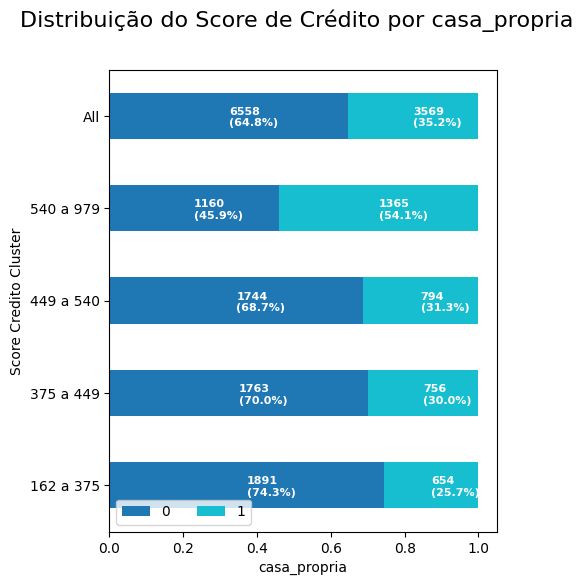

In [34]:
# Tabela bivariada - números absolutos
cross_tab = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'], columns=df_raw[variavel],margins=True)
# Tabela bivariada - proporção
cross_tab_prop = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'],
                             columns=df_raw[variavel],
                             normalize="index",margins=True,
                             margins_name='All')

# gráfico 100% empilhado com label
fig = plt.figure(figsize=(5, 6))

cross_tab_prop.plot(kind='barh',
                        stacked=True,
                        colormap='tab10',
                        figsize=(5, 6))

plt.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.legend(loc="lower left", ncol=2)
plt.xlabel(f"{variavel}")
plt.ylabel("Score Credito Cluster")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="white",
                 fontsize=8,
                 fontweight="bold")

plt.show()

In [35]:
# Teste qui-quadrado entre total e estação do ano
# Existe associação?
table1 = pd.crosstab(df_raw['fx_SCORE_CREDITO'],df_raw[variavel])

# estatísticas stat = valor do qui-quadrado, p= p-value, dof=graus de liberdade, expected = valores esperados
stat, p, dof, expected = chi2_contingency(table1)

# Interpretação do teste qui-quadrado
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=3
[[1648.08037918  896.91962082]
 [1631.24340871  887.75659129]
 [1643.54734867  894.45265133]
 [1635.12886343  889.87113657]]
probability=0.950, critical=7.815, stat=540.961
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


## 4.11 vl_imovel_em_mil

<Figure size 1000x600 with 0 Axes>

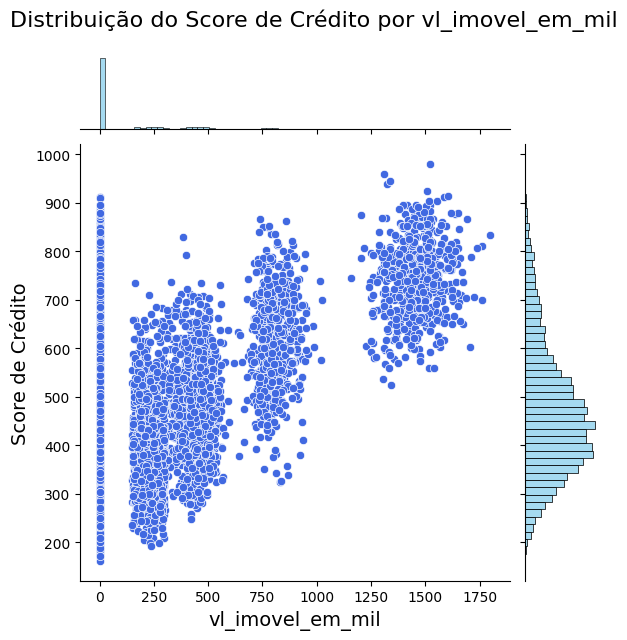

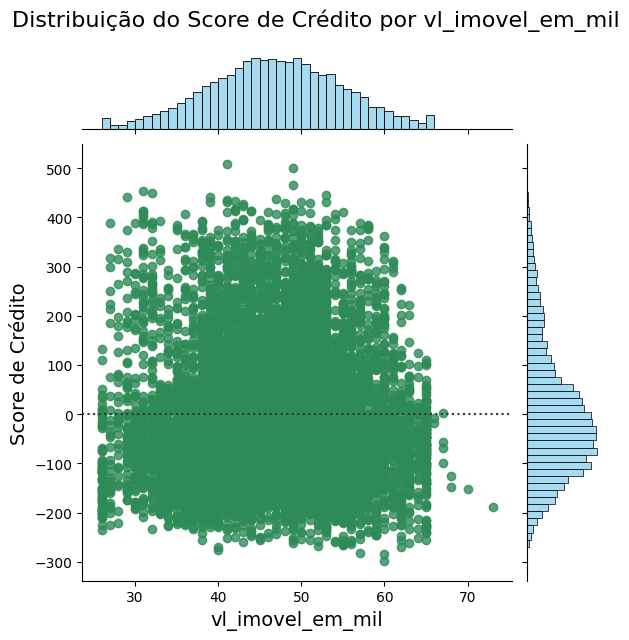

In [36]:
# Define a variável
variavel = 'vl_imovel_em_mil'

# Criar uma figura grande
fig = plt.figure(figsize=(10, 6))

# Criar primeiro gráfico (Scatter)
g1 = sns.jointplot(
    x= variavel, 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='scatter',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="royalblue"
)

g1.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g1.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Criar segundo gráfico (Residuais)
g2 = sns.jointplot(
    x='idade', 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='resid',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="seagreen"
)
g2.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g2.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Exibir os gráficos
plt.show()

In [37]:
# Correlação de Pearson
pearsonr(df_raw[variavel], df_raw['SCORE_CREDITO'])

PearsonRResult(statistic=np.float64(0.5372836655255089), pvalue=np.float64(0.0))

## 4.12 Qtd_cartoes

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/3727554680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')


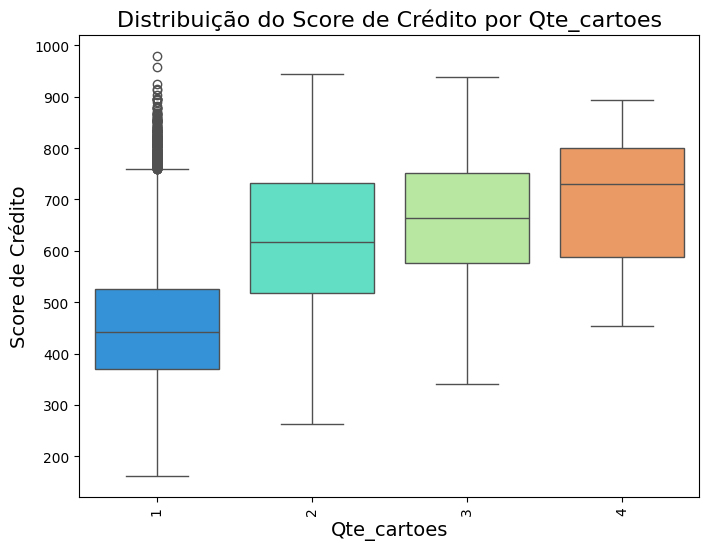

In [38]:
# Define a variável
variavel = 'Qte_cartoes'

# Criar uma figura grande
fig = plt.figure(figsize=(8, 6))

# Box Plot
g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')

# Ajuste dos rótulos
g1.set_xlabel(f"{variavel}", fontsize=14)  # Definir o rótulo do eixo X
g1.set_ylabel("Score de Crédito", fontsize=14)  # Definir o rótulo do eixo Y
g1.set_title(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.xticks(rotation=90)

# Exibir os gráficos
plt.show()

<Figure size 500x600 with 0 Axes>

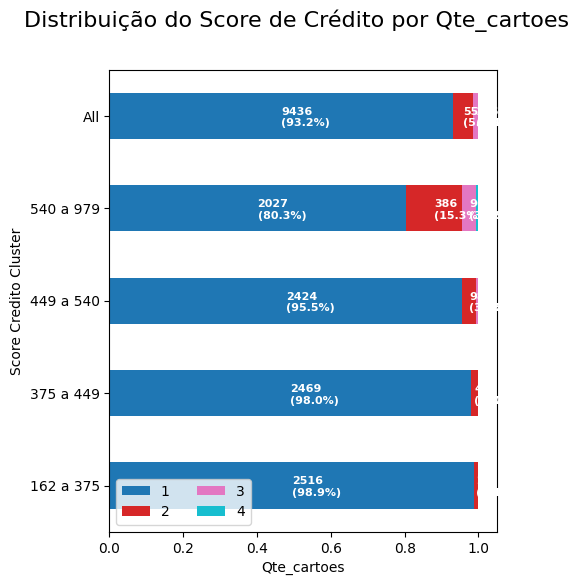

In [39]:
# Tabela bivariada - números absolutos
cross_tab = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'], columns=df_raw[variavel],margins=True)
# Tabela bivariada - proporção
cross_tab_prop = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'],
                             columns=df_raw[variavel],
                             normalize="index",margins=True,
                             margins_name='All')

# gráfico 100% empilhado com label
fig = plt.figure(figsize=(5, 6))

cross_tab_prop.plot(kind='barh',
                        stacked=True,
                        colormap='tab10',
                        figsize=(5, 6))

plt.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.legend(loc="lower left", ncol=2)
plt.xlabel(f"{variavel}")
plt.ylabel("Score Credito Cluster")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="white",
                 fontsize=8,
                 fontweight="bold")

plt.show()

In [40]:
# Teste qui-quadrado entre total e estação do ano
# Existe associação?
table1 = pd.crosstab(df_raw['fx_SCORE_CREDITO'],df_raw[variavel])

# estatísticas stat = valor do qui-quadrado, p= p-value, dof=graus de liberdade, expected = valores esperados
stat, p, dof, expected = chi2_contingency(table1)

# Interpretação do teste qui-quadrado
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=9
[[2371.34590698  139.47615286   29.15177249    5.02616767]
 [2347.1199763   138.05124914   28.85395477    4.97481979]
 [2364.82354103  139.09252493   29.0715908     5.01234324]
 [2352.71057569  138.38007307   28.92268194    4.9866693 ]]
probability=0.950, critical=16.919, stat=915.249
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


<Figure size 1000x600 with 0 Axes>

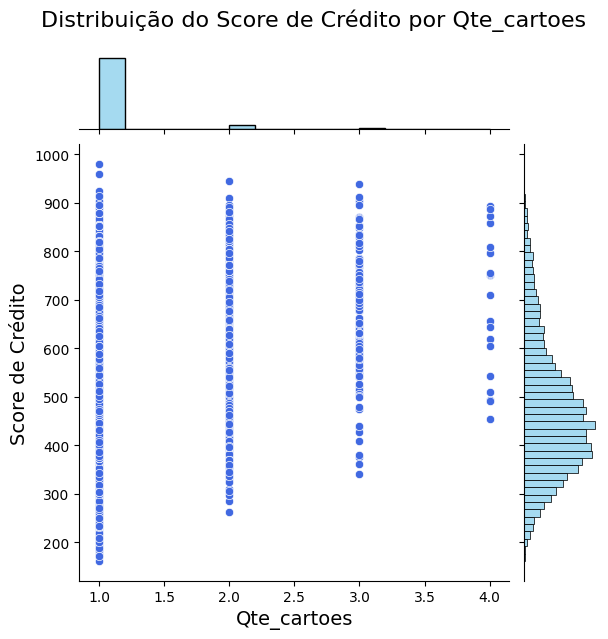

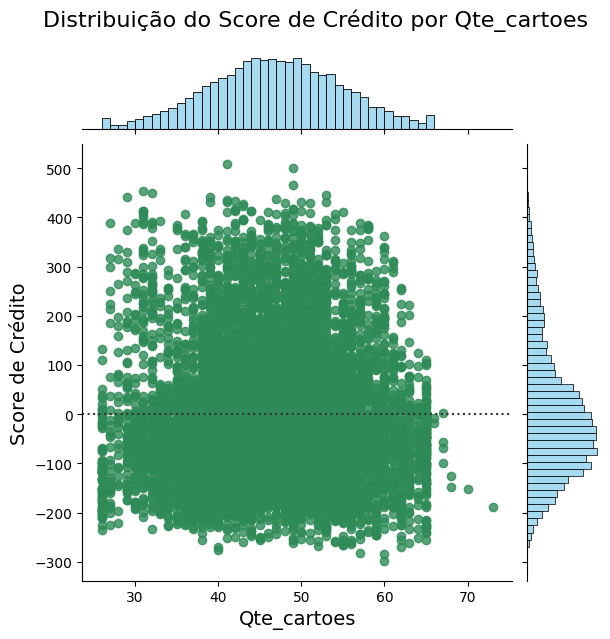

In [85]:
# Define a variável
variavel = 'Qte_cartoes'

# Criar uma figura grande
fig = plt.figure(figsize=(10, 6))

# Criar primeiro gráfico (Scatter)
g1 = sns.jointplot(
    x= variavel, 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='scatter',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="royalblue"
)

g1.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g1.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Criar segundo gráfico (Residuais)
g2 = sns.jointplot(
    x='idade', 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='resid',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="seagreen"
)
g2.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g2.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Exibir os gráficos
plt.show()

In [86]:
# Correlação de Pearson
pearsonr(df_raw[variavel], df_raw['SCORE_CREDITO'])

PearsonRResult(statistic=np.float64(0.31048112507916237), pvalue=np.float64(3.467367012876041e-225))

## 4.13 Qtd_carros

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_3857/3561702345.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')


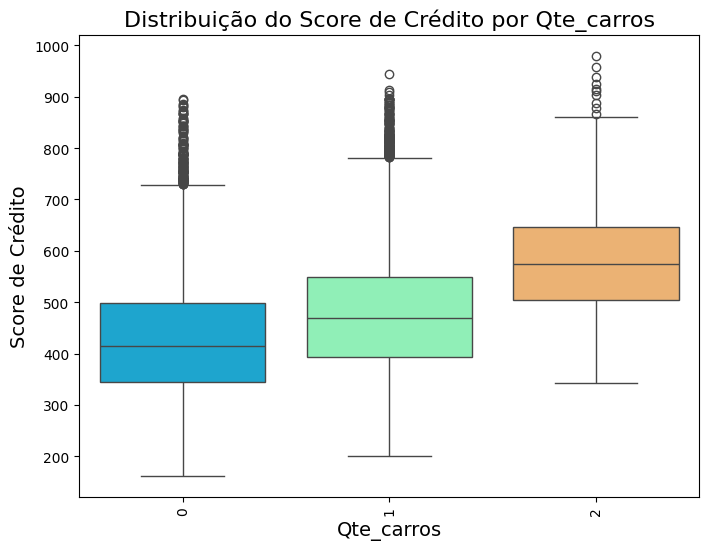

In [91]:
# Define a variável
variavel = 'Qte_carros'

# Criar uma figura grande
fig = plt.figure(figsize=(8, 6))

# Box Plot
g1 = sns.boxplot(x= variavel, y='SCORE_CREDITO', data=df_raw, palette = 'rainbow')

# Ajuste dos rótulos
g1.set_xlabel(f"{variavel}", fontsize=14)  # Definir o rótulo do eixo X
g1.set_ylabel("Score de Crédito", fontsize=14)  # Definir o rótulo do eixo Y
g1.set_title(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.xticks(rotation=90)

# Exibir os gráficos
plt.show()

<Figure size 500x600 with 0 Axes>

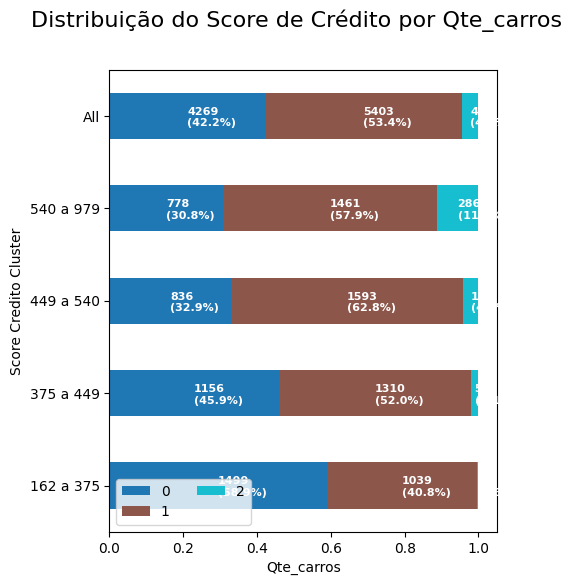

In [92]:
# Tabela bivariada - números absolutos
cross_tab = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'], columns=df_raw[variavel],margins=True)
# Tabela bivariada - proporção
cross_tab_prop = pd.crosstab(index=df_raw['fx_SCORE_CREDITO'],
                             columns=df_raw[variavel],
                             normalize="index",margins=True,
                             margins_name='All')

# gráfico 100% empilhado com label
fig = plt.figure(figsize=(5, 6))

cross_tab_prop.plot(kind='barh',
                        stacked=True,
                        colormap='tab10',
                        figsize=(5, 6))

plt.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16)
plt.legend(loc="lower left", ncol=2)
plt.xlabel(f"{variavel}")
plt.ylabel("Score Credito Cluster")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="white",
                 fontsize=8,
                 fontweight="bold")


In [93]:
# Teste qui-quadrado entre total e estação do ano
# Existe associação?
table1 = pd.crosstab(df_raw['fx_SCORE_CREDITO'],df_raw[variavel])

# estatísticas stat = valor do qui-quadrado, p= p-value, dof=graus de liberdade, expected = valores esperados
stat, p, dof, expected = chi2_contingency(table1)

# Interpretação do teste qui-quadrado
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=6
[[1072.83548929 1357.81919621  114.34531451]
 [1061.87528389 1343.94756591  113.17715019]
 [1069.88466476 1354.08452651  114.03080873]
 [1064.40456206 1347.14871137  113.44672657]]
probability=0.950, critical=12.592, stat=828.763
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


<Figure size 1000x600 with 0 Axes>

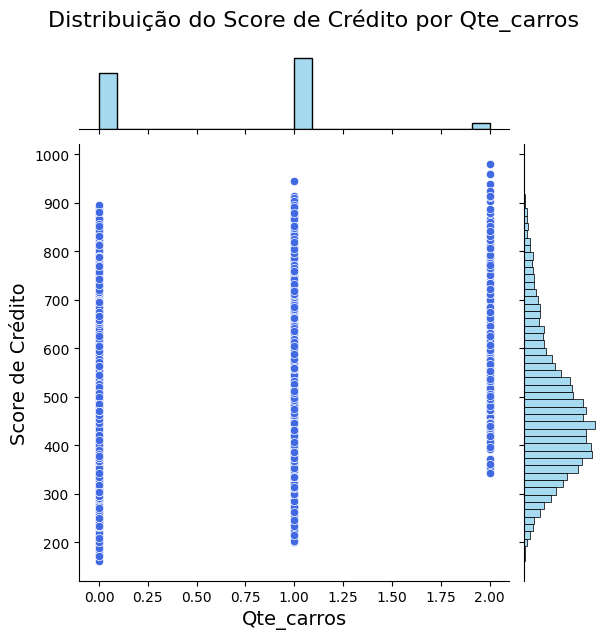

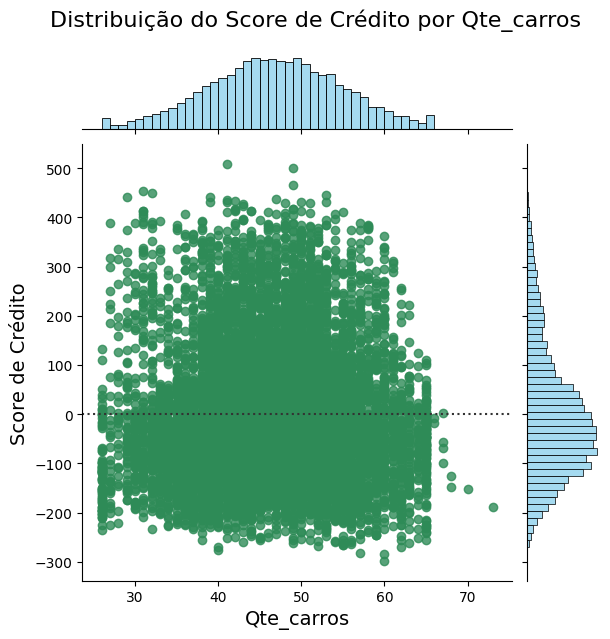

In [94]:
# Define a variável
variavel = 'Qte_carros'

# Criar uma figura grande
fig = plt.figure(figsize=(10, 6))

# Criar primeiro gráfico (Scatter)
g1 = sns.jointplot(
    x= variavel, 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='scatter',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="royalblue"
)

g1.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g1.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Criar segundo gráfico (Residuais)
g2 = sns.jointplot(
    x='idade', 
    y='SCORE_CREDITO', 
    data=df_raw, 
    kind='resid',
    ratio=5, 
    marginal_kws=dict(fill=True, color="skyblue"),
    color="seagreen"
)
g2.set_axis_labels(f"{variavel}", "Score de Crédito", fontsize=14)
g2.fig.suptitle(f"Distribuição do Score de Crédito por {variavel}", fontsize=16, y=1.05)

# Exibir os gráficos
plt.show()

In [95]:
# Correlação de Pearson
pearsonr(df_raw[variavel], df_raw['SCORE_CREDITO'])

PearsonRResult(statistic=np.float64(0.2530043697352228), pvalue=np.float64(1.1301308864900059e-147))

# 5. Modelo de Regressão Múltipla

In [116]:
colunas_modelo = ['sexo', 'estado_civil','escola','reg_moradia', 'idade','tempo_ultimoservico',
                  'vl_salario_mil','vl_imovel_em_mil','Qte_cartoes','Qte_carros','Qte_dependentes','SCORE_CREDITO']

df_modelo = df_raw[colunas_modelo].copy()

df_modelo

,sexo,estado_civil,escola,reg_moradia,idade,tempo_ultimoservico,vl_salario_mil,vl_imovel_em_mil,Qte_cartoes,Qte_carros,Qte_dependentes,SCORE_CREDITO
0,F,casado,graduacao,3,45,40,40.089665,0,1,1,3,778.0
1,M,solteiro,ensino fundam,3,58,44,66.557645,0,1,0,0,276.3
2,M,divorciado,doutorado,6,46,35,123.681821,0,1,1,3,401.0
3,F,solteiro,mestrado,6,34,22,19.715934,0,1,0,0,347.4
4,F,casado,mestrado,3,49,36,0.000000,437,1,2,2,476.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10122,M,casado,mestrado,4,50,45,100.128971,0,1,0,0,470.0
10123,M,solteiro,ensino fundam,6,38,31,89.805996,0,1,1,0,432.0
10124,F,casado,graduacao,3,49,43,19.799306,252,1,1,3,406.0
10125,M,casado,ensino medio,4,54,48,194.783176,0,1,1,4,387.0


In [117]:
# Pre-processing
# Mudar o formato da variável quantitativa em qualitativa
df_modelo['sexo']                = df_modelo['sexo'].astype(str)
df_modelo['estado_civil']        = df_modelo['estado_civil'].astype(str)
df_modelo['escola']              = df_modelo['escola'].astype(str)
df_modelo['reg_moradia']         = df_modelo['reg_moradia'].astype(str)
df_modelo['idade']               = df_modelo['idade'].astype(int)
df_modelo['tempo_ultimoservico'] = df_modelo['tempo_ultimoservico'].astype(int)
df_modelo['vl_salario_mil']      = df_modelo['vl_salario_mil'].astype(int)
df_modelo['vl_imovel_em_mil']    = df_modelo['vl_imovel_em_mil'].astype(int)
df_modelo['Qte_cartoes']         = df_modelo['Qte_cartoes'].astype(int)
df_modelo['Qte_carros']          = df_modelo['Qte_carros'].astype(int)
df_modelo['Qte_dependentes']     = df_modelo['Qte_dependentes'].astype(int)

df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sexo                 10127 non-null  object 
 1   estado_civil         10127 non-null  object 
 2   escola               10127 non-null  object 
 3   reg_moradia          10127 non-null  object 
 4   idade                10127 non-null  int64  
 5   tempo_ultimoservico  10127 non-null  int64  
 6   vl_salario_mil       10127 non-null  int64  
 7   vl_imovel_em_mil     10127 non-null  int64  
 8   Qte_cartoes          10127 non-null  int64  
 9   Qte_carros           10127 non-null  int64  
 10  Qte_dependentes      10127 non-null  int64  
 11  SCORE_CREDITO        10127 non-null  float64
dtypes: float64(1), int64(7), object(4)
memory usage: 949.5+ KB


In [126]:
# Selecionar as variáveis quantitativas
var_num = ['idade','tempo_ultimoservico','vl_salario_mil','vl_imovel_em_mil','Qte_cartoes','Qte_carros','Qte_dependentes']
# Selecionar as variáveis qualitativas
var_cat =['sexo', 'estado_civil','escola','reg_moradia']
# Selecoonar a variavel alvo
var_alvo = ['SCORE_CREDITO']

In [119]:
# Criar variáveis dummies para cada variável qualitativa e excluir a primeira categoria de cada variável
var_dummies = pd.get_dummies(df_modelo[var_cat], drop_first = True, dtype=int)
var_dummies

,sexo_M,estado_civil_divorciado,estado_civil_na,estado_civil_solteiro,escola_ensino fundam,escola_ensino medio,escola_graduacao,escola_mestrado,reg_moradia_2,reg_moradia_3,reg_moradia_4,reg_moradia_5,reg_moradia_6
0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,1,0,0,1,1,0,0,0,0,1,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,0,0,0,0,0,0,1,0,0,1,0,0
10123,1,0,0,1,1,0,0,0,0,0,0,0,1
10124,0,0,0,0,0,0,1,0,0,1,0,0,0
10125,1,0,0,0,0,1,0,0,0,0,1,0,0


In [128]:
# Merge dos arquivos df e dummies
df_modelo_num = df_modelo[var_num].copy()
df_modelo_alvo = df_modelo[var_alvo].copy()
df_modelo_tratado = pd.concat([df_modelo_num, var_dummies, df_modelo_alvo], axis=1)

df_modelo_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    10127 non-null  int64  
 1   tempo_ultimoservico      10127 non-null  int64  
 2   vl_salario_mil           10127 non-null  int64  
 3   vl_imovel_em_mil         10127 non-null  int64  
 4   Qte_cartoes              10127 non-null  int64  
 5   Qte_carros               10127 non-null  int64  
 6   Qte_dependentes          10127 non-null  int64  
 7   sexo_M                   10127 non-null  int64  
 8   estado_civil_divorciado  10127 non-null  int64  
 9   estado_civil_na          10127 non-null  int64  
 10  estado_civil_solteiro    10127 non-null  int64  
 11  escola_ensino fundam     10127 non-null  int64  
 12  escola_ensino medio      10127 non-null  int64  
 13  escola_graduacao         10127 non-null  int64  
 14  escola_mestrado       

## 5.1 Modelo Base

In [129]:
# Selecionar as variáveis preditoras e a resposta
X = df_modelo_tratado.drop(['SCORE_CREDITO'], axis=1)
y = df_modelo_tratado['SCORE_CREDITO']

In [122]:
# random_state é o número aleatório usado para sortear as amostras. O seu uso é opcional.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=2024)

In [123]:
#Modelo de regressão linear múltipla
# constante do modelo (intercepto)
X_ = sm.add_constant(X_train)

In [124]:
#Modelo de regressão linear múltipla
model1 = sm.OLS(y_train, X_).fit()

#results = model.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          SCORE_CREDITO   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     582.5
Date:                Sat, 08 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:17:08   Log-Likelihood:                -41345.
No. Observations:                7088   AIC:                         8.273e+04
Df Residuals:                    7067   BIC:                         8.288e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## 5.2 Qtde Cartoes, Carros e Dependentes como qualitativo

In [155]:
#Alterando as variaveis para string
df_modelo['Qte_cartoes']         = df_modelo['Qte_cartoes'].astype(str)
df_modelo['Qte_carros']          = df_modelo['Qte_carros'].astype(str)
df_modelo['Qte_dependentes']     = df_modelo['Qte_dependentes'].astype(str)

# Selecionar as variáveis quantitativas
var_num = ['idade','tempo_ultimoservico','vl_salario_mil','vl_imovel_em_mil']
# Selecionar as variáveis qualitativas
var_cat =['sexo', 'estado_civil','escola','reg_moradia','Qte_cartoes','Qte_carros','Qte_dependentes']
# Selecoonar a variavel alvo
var_alvo = ['SCORE_CREDITO']

# Criar variáveis dummies para cada variável qualitativa e excluir a primeira categoria de cada variável
var_dummies = pd.get_dummies(df_modelo[var_cat], drop_first = True, dtype=int)

# Merge dos arquivos df e dummies
df_modelo_num = df_modelo[var_num].copy()
df_modelo_alvo = df_modelo[var_alvo].copy()
df_modelo_tratado = pd.concat([df_modelo_num, var_dummies, df_modelo_alvo], axis=1)

df_modelo_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    10127 non-null  int64  
 1   tempo_ultimoservico      10127 non-null  int64  
 2   vl_salario_mil           10127 non-null  int64  
 3   vl_imovel_em_mil         10127 non-null  int64  
 4   sexo_M                   10127 non-null  int64  
 5   estado_civil_divorciado  10127 non-null  int64  
 6   estado_civil_na          10127 non-null  int64  
 7   estado_civil_solteiro    10127 non-null  int64  
 8   escola_ensino fundam     10127 non-null  int64  
 9   escola_ensino medio      10127 non-null  int64  
 10  escola_graduacao         10127 non-null  int64  
 11  escola_mestrado          10127 non-null  int64  
 12  reg_moradia_2            10127 non-null  int64  
 13  reg_moradia_3            10127 non-null  int64  
 14  reg_moradia_4         

In [156]:
# Selecionar as variáveis preditoras e a resposta
X = df_modelo_tratado.drop(['SCORE_CREDITO'], axis=1)
y = df_modelo_tratado['SCORE_CREDITO']

In [157]:
# random_state é o número aleatório usado para sortear as amostras. O seu uso é opcional.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=2024)

In [158]:
#Modelo de regressão linear múltipla
# constante do modelo (intercepto)
X_ = sm.add_constant(X_train)

In [159]:
#Modelo de regressão linear múltipla
model1 = sm.OLS(y_train, X_).fit()

#results = model.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          SCORE_CREDITO   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     445.7
Date:                Sat, 08 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:36:55   Log-Likelihood:                -41271.
No. Observations:                7088   AIC:                         8.260e+04
Df Residuals:                    7060   BIC:                         8.279e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### 5.2.1 Análise de resíduos

In [161]:
# transformar em data frame
df_ytrain = pd.DataFrame(y_train)
df_ytrain.head()

,SCORE_CREDITO
7339,401.6
9742,522.0
5526,450.0
5400,491.0
2353,477.0


In [163]:
# Calculando o valor predito da variável resposta na amostra treino e teste
df_ytrain['pred'] = model1.predict(X_)
df_ytrain.head()

,SCORE_CREDITO,pred
7339,401.6,426.296293
9742,522.0,439.976201
5526,450.0,488.387156
5400,491.0,473.350234
2353,477.0,445.259579


In [166]:
# transformar em data frame
df_xtrain = pd.DataFrame(X_train)
# Concatenar as bases X e y
df_train = pd.concat([df_xtrain, df_ytrain], axis=1)

In [169]:
# cálculo dos resíduos
df_train['residuo'] = df_train['SCORE_CREDITO'] - df_train['pred']
df_train

,idade,tempo_ultimoservico,vl_salario_mil,vl_imovel_em_mil,sexo_M,estado_civil_divorciado,estado_civil_na,estado_civil_solteiro,escola_ensino fundam,escola_ensino medio,...,Qte_carros_1,Qte_carros_2,Qte_dependentes_1,Qte_dependentes_2,Qte_dependentes_3,Qte_dependentes_4,Qte_dependentes_5,SCORE_CREDITO,pred,residuo
7339,56,43,0,473,0,0,0,0,0,1,...,0,0,0,1,0,0,0,401.6,426.296293,-24.696293
9742,35,27,88,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,522.0,439.976201,82.023799
5526,43,32,66,477,1,0,0,0,0,1,...,1,0,0,1,0,0,0,450.0,488.387156,-38.387156
5400,47,36,96,280,1,0,0,0,0,0,...,1,0,0,0,1,0,0,491.0,473.350234,17.649766
2353,39,25,66,471,0,0,0,0,1,0,...,1,0,0,0,0,1,0,477.0,445.259579,31.740421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,56,40,24,455,0,0,0,1,1,0,...,1,0,0,0,0,0,0,520.2,476.496076,43.703924
2688,60,34,25,519,0,0,0,0,1,0,...,1,0,1,0,0,0,0,473.0,426.565450,46.434550
2656,46,31,22,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,507.0,487.902003,19.097997
3578,62,49,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,412.8,462.750615,-49.950615


In [170]:
df_train['residuo'].describe()

count    7.088000e+03
mean    -2.617620e-14
std      8.176235e+01
min     -2.649886e+02
25%     -5.416202e+01
50%     -2.736004e+00
75%      4.756500e+01
max      4.131275e+02
Name: residuo, dtype: float64

In [171]:
# padronizar a variável para Normal com média igual a zero e desvio padrão igual a 1
df_train['residuo_padronizado']= (df_train['residuo'])/8.176235e+01

Text(0.5, 0, 'Residuos padronizados')

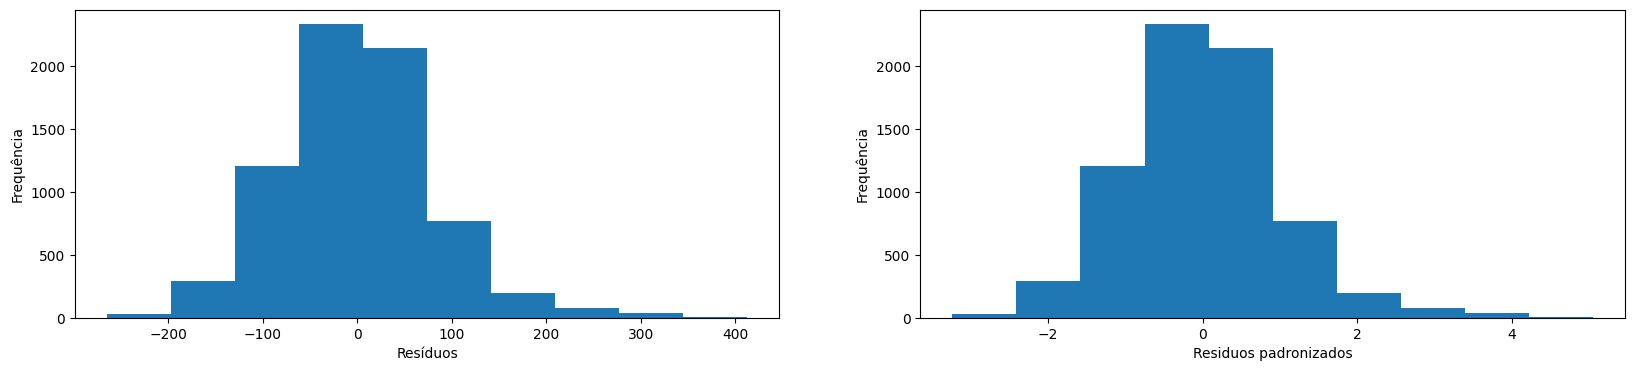

In [172]:
# Gráfico histograma dos resíduos e resíduos padronizados para detecção de outliers
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,4))

plt.subplot(1,2,1)
plt.hist(df_train['residuo'], bins=10)
plt.ylabel('Frequência')
plt.xlabel('Resíduos')
plt.subplot(1,2,2)
plt.hist(df_train['residuo_padronizado'], bins=10)
plt.ylabel('Frequência')
plt.xlabel('Residuos padronizados')

### 5.2.2 Excluir outliers

In [173]:
# Removendo os Outliers
df_train_SemOutlier = df_train.loc[(df_train['residuo_padronizado'] >= -2) & (df_train['residuo_padronizado'] <= 2)]
df_train_SemOutlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6771 entries, 7339 to 7816
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    6771 non-null   int64  
 1   tempo_ultimoservico      6771 non-null   int64  
 2   vl_salario_mil           6771 non-null   int64  
 3   vl_imovel_em_mil         6771 non-null   int64  
 4   sexo_M                   6771 non-null   int64  
 5   estado_civil_divorciado  6771 non-null   int64  
 6   estado_civil_na          6771 non-null   int64  
 7   estado_civil_solteiro    6771 non-null   int64  
 8   escola_ensino fundam     6771 non-null   int64  
 9   escola_ensino medio      6771 non-null   int64  
 10  escola_graduacao         6771 non-null   int64  
 11  escola_mestrado          6771 non-null   int64  
 12  reg_moradia_2            6771 non-null   int64  
 13  reg_moradia_3            6771 non-null   int64  
 14  reg_moradia_4            6

In [194]:
df_train_SemOutlier

,idade,tempo_ultimoservico,vl_salario_mil,vl_imovel_em_mil,sexo_M,estado_civil_divorciado,estado_civil_na,estado_civil_solteiro,escola_ensino fundam,escola_ensino medio,...,Qte_carros_2,Qte_dependentes_1,Qte_dependentes_2,Qte_dependentes_3,Qte_dependentes_4,Qte_dependentes_5,SCORE_CREDITO,pred,residuo,residuo_padronizado
7339,56,43,0,473,0,0,0,0,0,1,...,0,0,1,0,0,0,401.6,426.296293,-24.696293,-0.302050
9742,35,27,88,0,1,0,0,1,0,0,...,0,0,0,0,0,0,522.0,439.976201,82.023799,1.003198
5526,43,32,66,477,1,0,0,0,0,1,...,0,0,1,0,0,0,450.0,488.387156,-38.387156,-0.469497
5400,47,36,96,280,1,0,0,0,0,0,...,0,0,0,1,0,0,491.0,473.350234,17.649766,0.215867
2353,39,25,66,471,0,0,0,0,1,0,...,0,0,0,0,1,0,477.0,445.259579,31.740421,0.388203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,56,40,24,455,0,0,0,1,1,0,...,0,0,0,0,0,0,520.2,476.496076,43.703924,0.534524
2688,60,34,25,519,0,0,0,0,1,0,...,0,1,0,0,0,0,473.0,426.565450,46.434550,0.567921
2656,46,31,22,0,1,0,0,0,0,0,...,0,0,0,1,0,0,507.0,487.902003,19.097997,0.233579
3578,62,49,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,412.8,462.750615,-49.950615,-0.610924


In [174]:
# Deletar as variáveis do X_train: total, pred, residuo e resíduo_padronizado 
# Selecionar a variável resposta do modelo
X_train_semout = df_train_SemOutlier.drop(['SCORE_CREDITO','pred','residuo','residuo_padronizado',
                                           'reg_moradia_2','Qte_dependentes_1','Qte_dependentes_2'], axis=1)
y_train_semout = df_train_SemOutlier['SCORE_CREDITO']

In [175]:
#Modelo de regressão linear múltipla
# constante do modelo (intercepto)
X_ = sm.add_constant(X_train_semout)

In [176]:
model2 = sm.OLS(y_train_semout, X_).fit()

#results = model.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          SCORE_CREDITO   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     730.9
Date:                Sat, 08 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:58:54   Log-Likelihood:                -38125.
No. Observations:                6771   AIC:                         7.630e+04
Df Residuals:                    6746   BIC:                         7.647e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### 5.2.3 Avaliação de erros

In [180]:
# Calculando o valor predito da variável resposta na amostra treino e teste
y_train_pred2 = model2.predict(X_)

In [183]:
# Apagar as variáveis preditoras:
X_test1 = X_test.drop(['reg_moradia_2','Qte_dependentes_1','Qte_dependentes_2'], axis=1)
# constante do modelo (intercepto)
X_t = sm.add_constant(X_test1)
y_test_pred  = model2.predict(X_t)

In [178]:
# Medidas de erro na amostra treino
me1   = round((y_train_semout-y_train_pred2).mean(),2)
mae1  = (mean_absolute_error(y_train_semout, y_train_pred2)).round(2)
mse1  = (mean_squared_error(y_train_semout, y_train_pred2)).round(2)
rmse1  = (np.sqrt(mean_squared_error(y_train_semout, y_train_pred2))).round(2)
mpe1  = round(((y_train_semout - y_train_pred2)/y_train_pred2).mean(),2)
mape1  =  round((mae1/y_train_semout).mean(),2) 

In [184]:
# Medidas de erro na amostra teste
me2   = round((y_test-y_test_pred).mean(),2)
mae2  = (mean_absolute_error(y_test, y_test_pred)).round(2)
mse2  = (mean_squared_error(y_test, y_test_pred)).round(2)
rmse2  = (np.sqrt(mean_squared_error(y_test, y_test_pred))).round(2)
mpe2  = round(((y_test - y_test_pred)/y_test).mean(),2)
mape2  =  round((mae2/y_test).mean(),2) 


In [190]:
# Comparcao dos erros entre as amostras
list1 = [me1, mae1,mse1,rmse1,mpe1, mape1]
list2 = [me2, mae2,mse2,rmse2,mpe2, mape2]
erros = pd.DataFrame({"treino":list1, "teste": list2}, index=['me', 'mae', 'mse', 'rmse', 'mpe', 'mape'])
erros

,treino,teste
me,0.00,5.01
mae,54.80,62.56
mse,4552.57,6732.63
rmse,67.47,82.05
mpe,0.00,-0.02
mape,0.13,0.14


In [191]:
erros['treino']

me         0.00
mae       54.80
mse     4552.57
rmse      67.47
mpe        0.00
mape       0.13
Name: treino, dtype: float64

In [192]:
erros['teste']

me         5.01
mae       62.56
mse     6732.63
rmse      82.05
mpe       -0.02
mape       0.14
Name: teste, dtype: float64

# 5.3 Normalizado

In [ ]:


scaler = StandardScaler()
colunas_modelo[colunas_numericas] = scaler.fit_transform(colunas_modelo[colunas_numericas])


In [145]:
#Alterando as variaveis para string
df_modelo['Qte_cartoes']         = df_modelo['Qte_cartoes'].astype(str)
df_modelo['Qte_carros']          = df_modelo['Qte_carros'].astype(str)
df_modelo['Qte_dependentes']     = df_modelo['Qte_dependentes'].astype(str)

# Selecionar as variáveis quantitativas
var_num = ['idade','tempo_ultimoservico','vl_salario_mil','vl_imovel_em_mil']
# Selecionar as variáveis qualitativas
var_cat =['sexo', 'estado_civil','escola','reg_moradia','Qte_cartoes','Qte_carros','Qte_dependentes']
# Selecoonar a variavel alvo
var_alvo = ['SCORE_CREDITO']

# Criar variáveis dummies para cada variável qualitativa e excluir a primeira categoria de cada variável
var_dummies = pd.get_dummies(df_modelo[var_cat], drop_first = True, dtype=int)

# Normaliza as variveis numericas
scaler = StandardScaler()
df_modelo_num = df_modelo[var_num].copy()  # Garante que estamos trabalhando em uma cópia
df_modelo_num[var_num] = scaler.fit_transform(df_modelo[var_num])

# Merge dos arquivos df e dummies

df_modelo_alvo = df_modelo[var_alvo].copy()
df_modelo_tratado = pd.concat([df_modelo_num, var_dummies, df_modelo_alvo], axis=1)

df_modelo_tratado.head()

,idade,tempo_ultimoservico,vl_salario_mil,vl_imovel_em_mil,sexo_M,estado_civil_divorciado,estado_civil_na,estado_civil_solteiro,escola_ensino fundam,escola_ensino medio,...,Qte_cartoes_3,Qte_cartoes_4,Qte_carros_1,Qte_carros_2,Qte_dependentes_1,Qte_dependentes_2,Qte_dependentes_3,Qte_dependentes_4,Qte_dependentes_5,SCORE_CREDITO
0,-0.165406,0.713633,-0.536090,-0.552212,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,778.0
1,1.456266,1.200190,-0.067675,-0.552212,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,276.3
2,-0.040662,0.105436,0.959235,-0.552212,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,401.0
3,-1.537589,-1.475876,-0.914425,-0.552212,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,347.4
4,0.333570,0.227075,-1.256728,0.602417,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,476.0


In [146]:
# Selecionar as variáveis preditoras e a resposta
X = df_modelo_tratado.drop(['SCORE_CREDITO'], axis=1)
y = df_modelo_tratado['SCORE_CREDITO']

In [147]:
# random_state é o número aleatório usado para sortear as amostras. O seu uso é opcional.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=2024)

In [148]:
#Modelo de regressão linear múltipla
# constante do modelo (intercepto)
X_ = sm.add_constant(X_train)

In [149]:
#Modelo de regressão linear múltipla
model1 = sm.OLS(y_train, X_).fit()

#results = model.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          SCORE_CREDITO   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     445.7
Date:                Sat, 08 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:33:11   Log-Likelihood:                -41271.
No. Observations:                7088   AIC:                         8.260e+04
Df Residuals:                    7060   BIC:                         8.279e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     